In [5]:
import csv
import numpy as np
from math import sqrt, pi, sin, cos
import matplotlib.pyplot as plt
from numpy import linspace, logspace
import magopacitiesmlk as mo

#makes plots bigger and use Latex fonts
from matplotlib import rcParams
rcParams["figure.dpi"]=600
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 3
rcParams['legend.framealpha'] = 1
rcParams['legend.edgecolor'] = 'k'

In [6]:
from importlib import reload
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

In [7]:
HBARC = 197.3269718
NEUTRON_MASS = 939.5653 / HBARC
PROTON_MASS = 938.272 / HBARC
MN = 2 * NEUTRON_MASS * PROTON_MASS / (NEUTRON_MASS + PROTON_MASS)
MUON_MASS = 105.7 / HBARC
ELECTRON_MASS = 0.511 / HBARC
GA = 1.267
MEVFM3_TO_GCM3 = 1.78e12
FM4_TO_DYNECM2 = 3.16e35
G15_TO_FM = 19.5 * sqrt(4 * pi / 137) / HBARC**2
COS_TC = sqrt(0.95)
GF = (HBARC / 292800)**2

CC_FACTOR = GF**2 * COS_TC**2 * 10**13
NC_FACTOR = GF**2 * 10**13

In [7]:

data_arr = np.empty((45, 16))
counter = 0
with open('./opacity csvs/ccdata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    counter = 0
    for row in reader:
        data_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

<>:17: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
<>:17: SyntaxWarning: invalid escape sequence '\k'
<>:32: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_416/945636164.py:17: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_416/945636164.py:32: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-08, 0.001)

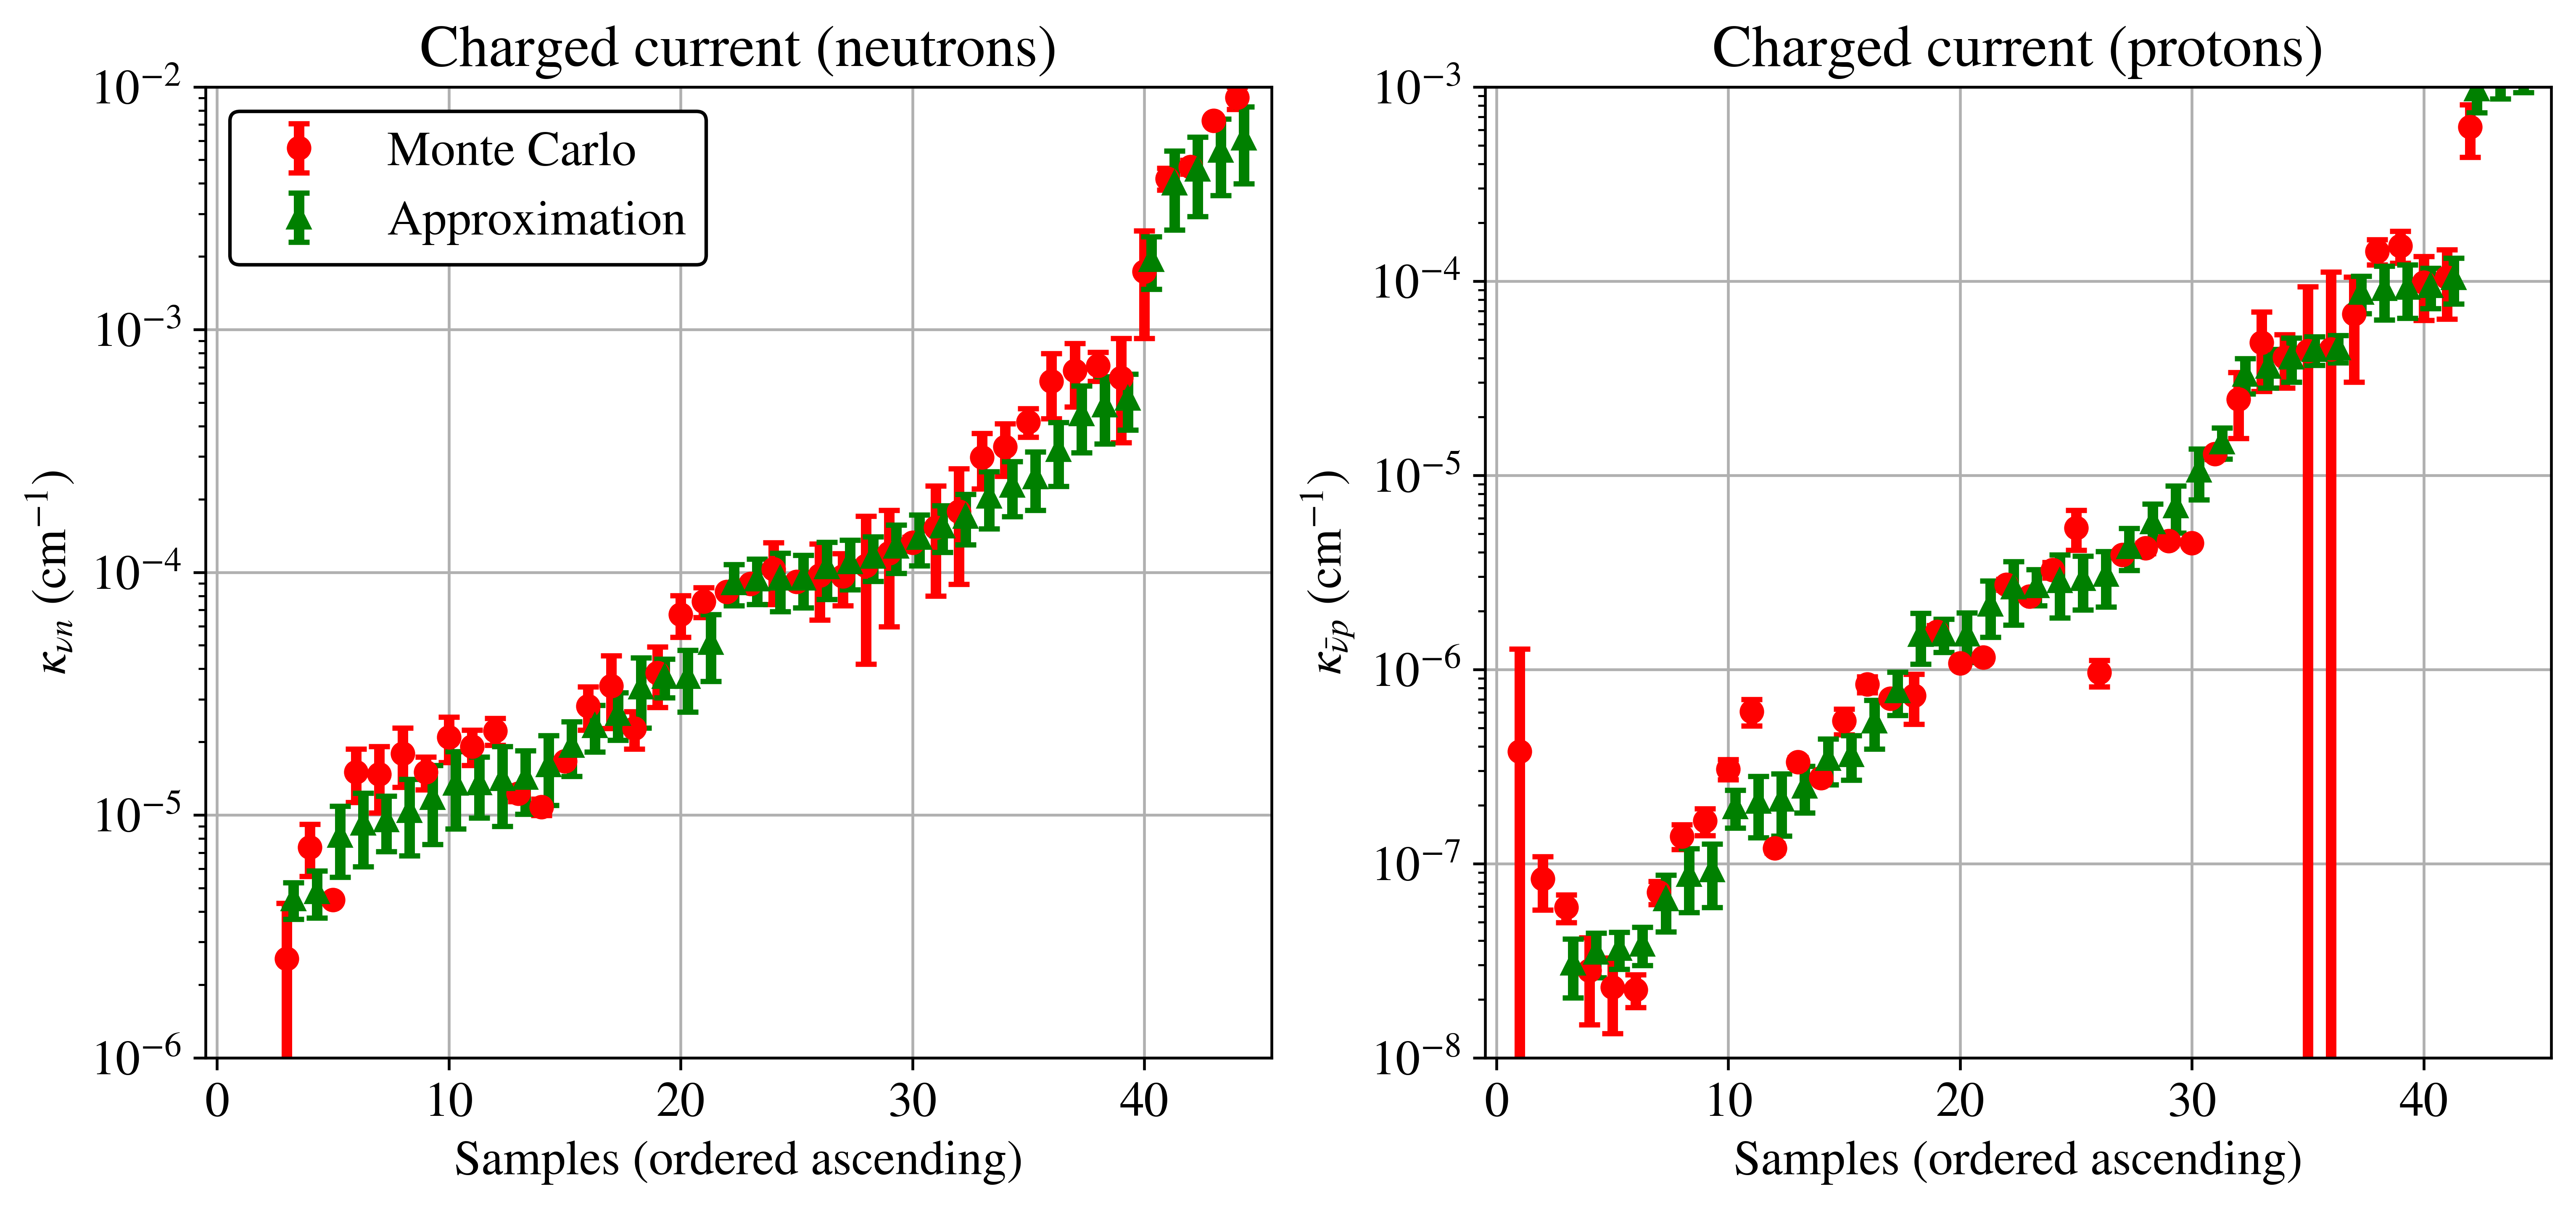

In [8]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

n_approx = [10**13 * mo.kappan(sorted_data[ix, -8], sorted_data[ix, -7], sorted_data[ix, -6],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1], False) for ix in range(45)]
n_approx_err = [elt * sqrt((sorted_data[ix, -7] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(n_approx)]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(45)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0] * GF**2 * COS_TC**2 * 10**13, sorted_data[:, 1] * GF**2 * COS_TC**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], n_approx, n_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]

p_approx = [10**13 * mo.kappap(sorted_data[ix, -8], sorted_data[ix, -7], sorted_data[ix, -6],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1], False) for ix in range(45)]
p_approx_err = [elt * sqrt((sorted_data[ix, -7] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(p_approx)]

xpts = range(45) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2] * GF**2 * COS_TC**2 * 10**13, sorted_data[:, 3] * GF**2 * COS_TC**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], p_approx, p_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)
ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 45.5])
ax2.set_xlim([-0.5, 45.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Charged current (neutrons)')
ax2.set_title('Charged current (protons)')
ax1.set_ylim([1e-6, 1e-2])
ax2.set_ylim([1e-8, 1e-3])

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_416/2212323165.py:23: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_416/2212323165.py:26: SyntaxWarning: invalid escape sequence '\k'
  plt.legend(['$\\bar{\\nu} + p \\rightarrow n + e^+$', '$\\nu + n \\rightarrow p + e$'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchicc:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchicc:.2f}')
/tmp/ipykernel_416/2212323165.py:26: SyntaxWarning: invalid escape sequenc

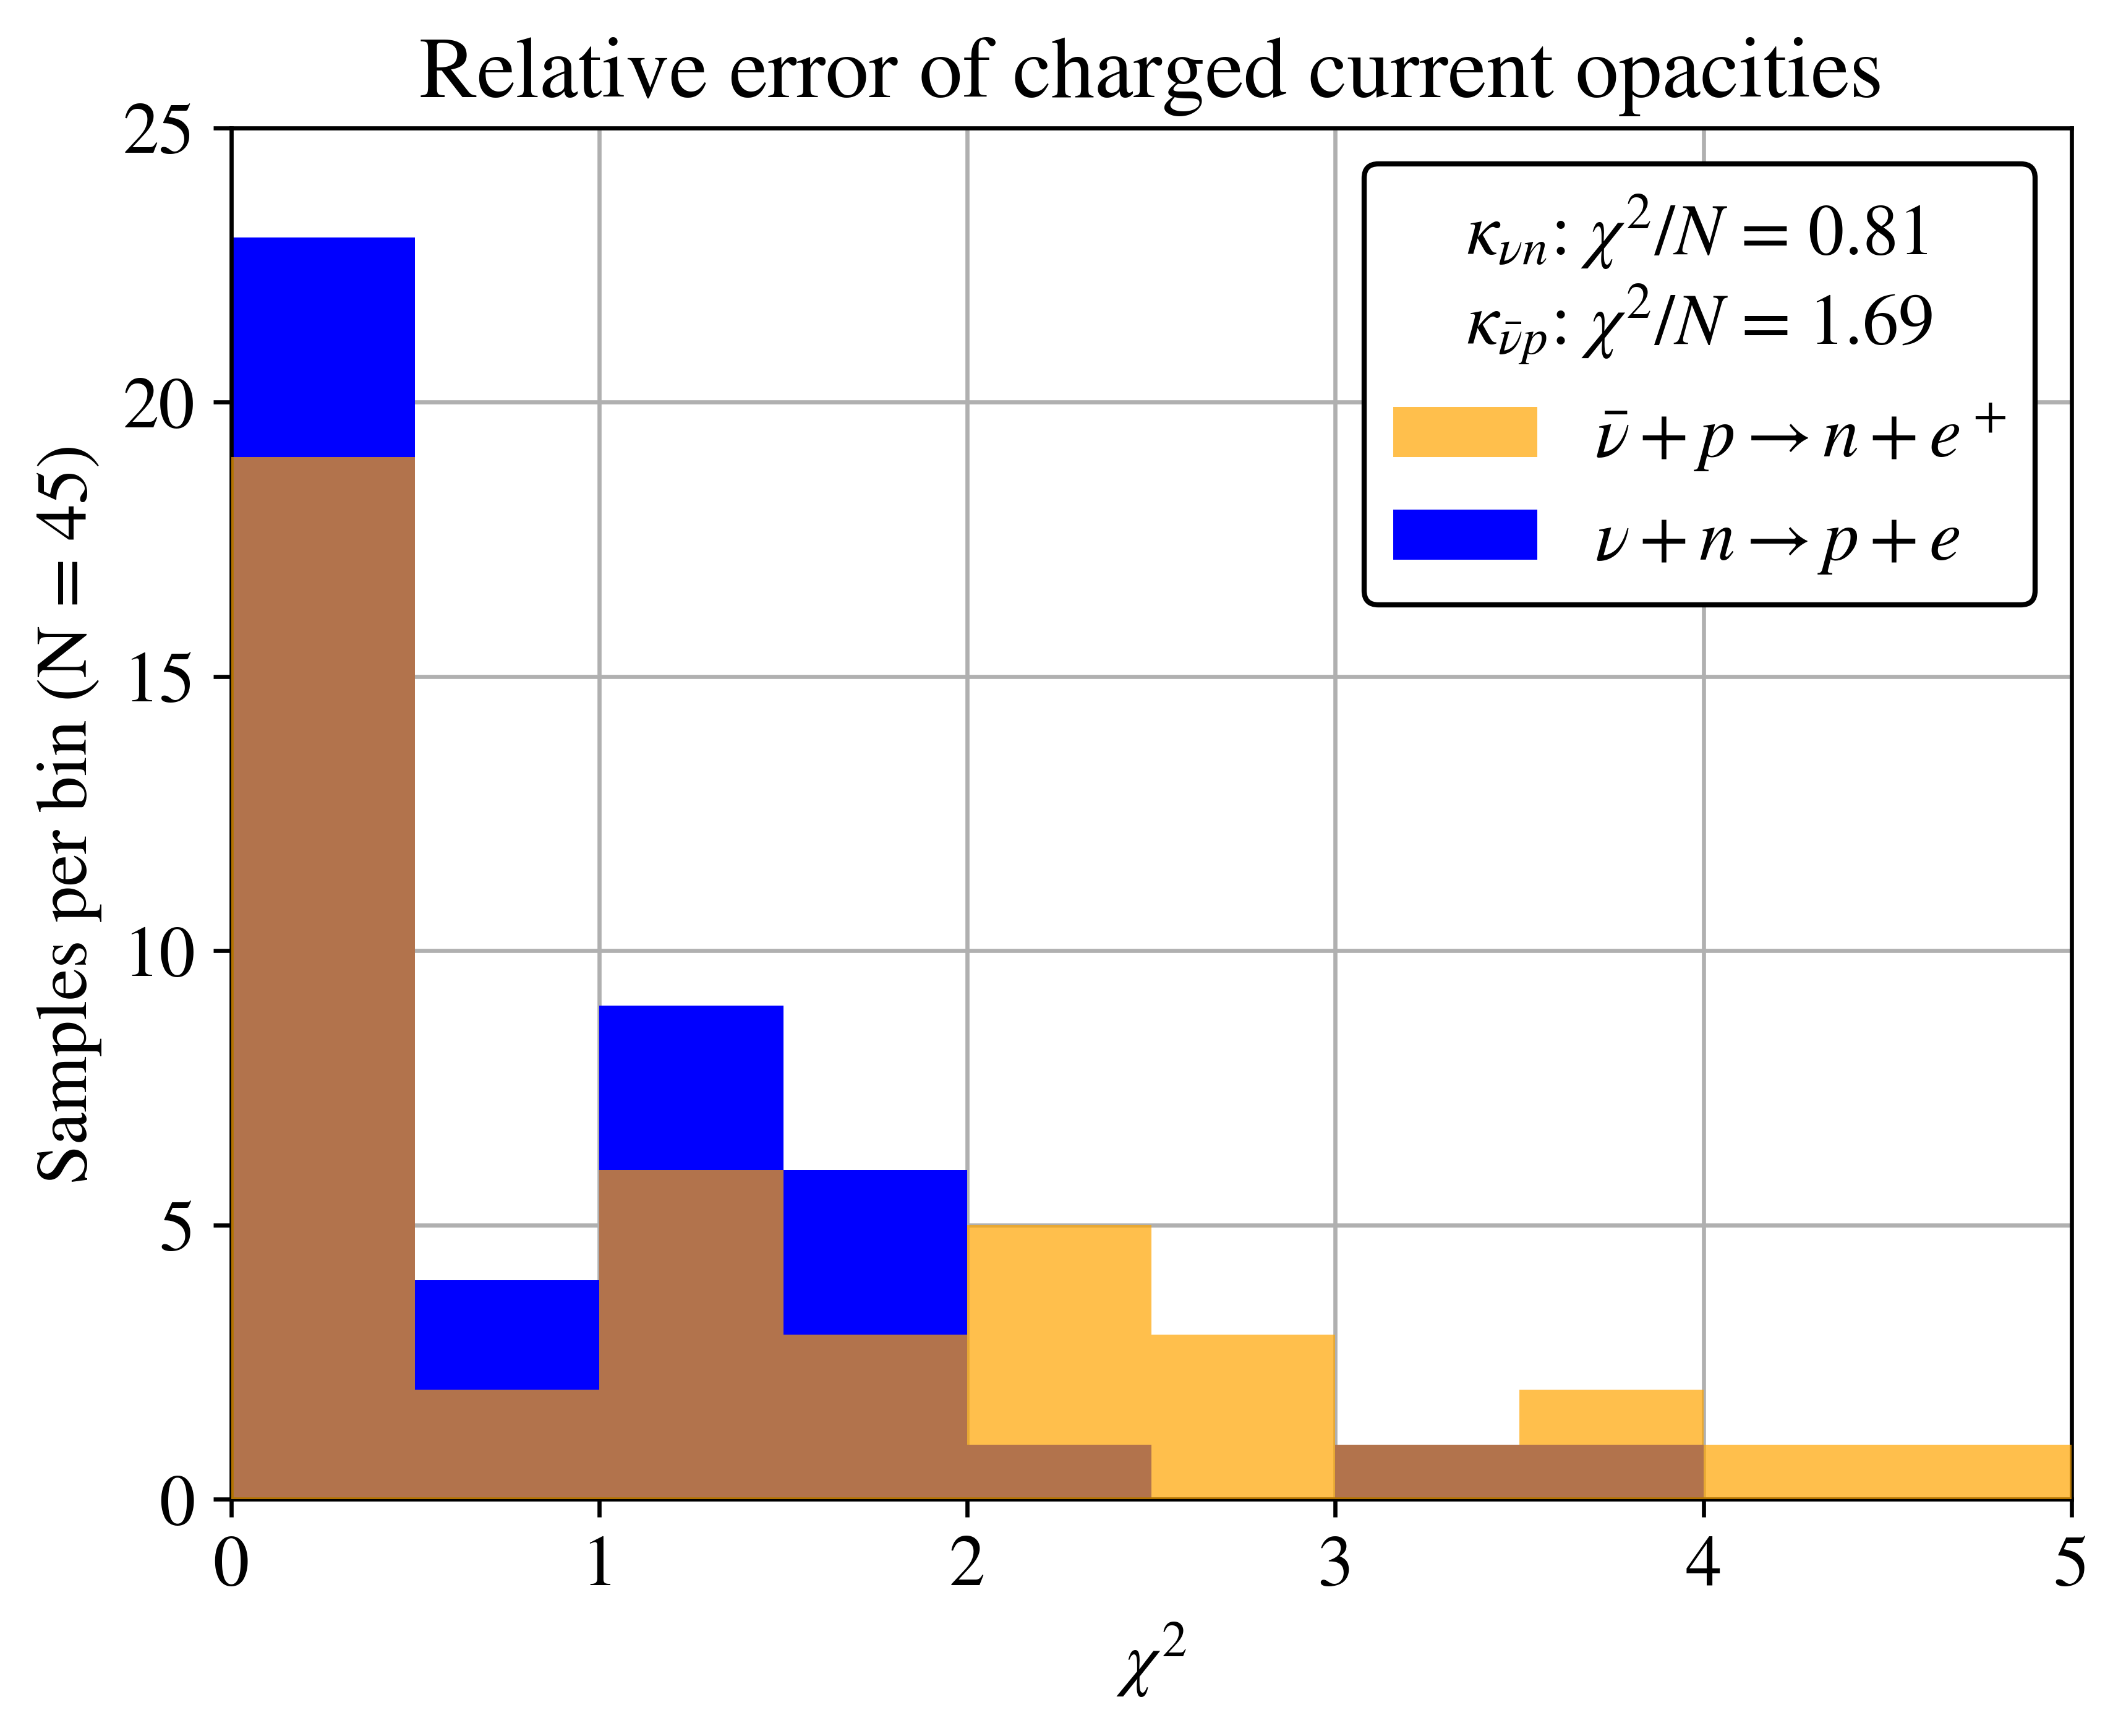

In [10]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

chisq_ncc = (sorted_data[:, 0] * GF**2 * COS_TC**2 * 10**13 - np.array(n_approx))**2 / ((sorted_data[:, 1] * GF**2 * COS_TC**2 * 10**13)**2 + np.array(n_approx_err)**2)

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]

chisq_pcc = (sorted_data[:, 2] * GF**2 * COS_TC**2 * 10**13 - np.array(p_approx))**2 / ((sorted_data[:, 3] * GF**2 * COS_TC**2 * 10**13)**2 + np.array(p_approx_err)**2)

nchicc = np.sum(chisq_ncc) / 45
pchicc = np.sum(chisq_pcc) / 45

plt.hist(chisq_pcc, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_ncc, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 5])
plt.ylim([0, 25])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 45)')
plt.title('Relative error of charged current opacities')
plt.legend(['$\\bar{\\nu} + p \\rightarrow n + e^+$', '$\\nu + n \\rightarrow p + e$'], title = '$\kappa_{\\nu n } $' + f': $\chi^2 / N$ = {nchicc:.2f}' + '\n' + '$\kappa_{\\bar{\\nu} p } $' + f': $\chi^2 / N$ = {pchicc:.2f}')


In [4]:
ncdata_arr = np.empty((54, 27))
counter = 0
with open('./opacity csvs/ncdata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    counter = 0
    for row in reader:
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\k'
<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_416/660798235.py:38: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
/tmp/ipykernel_416/660798235.py:39: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')


(1e-08, 0.0001)

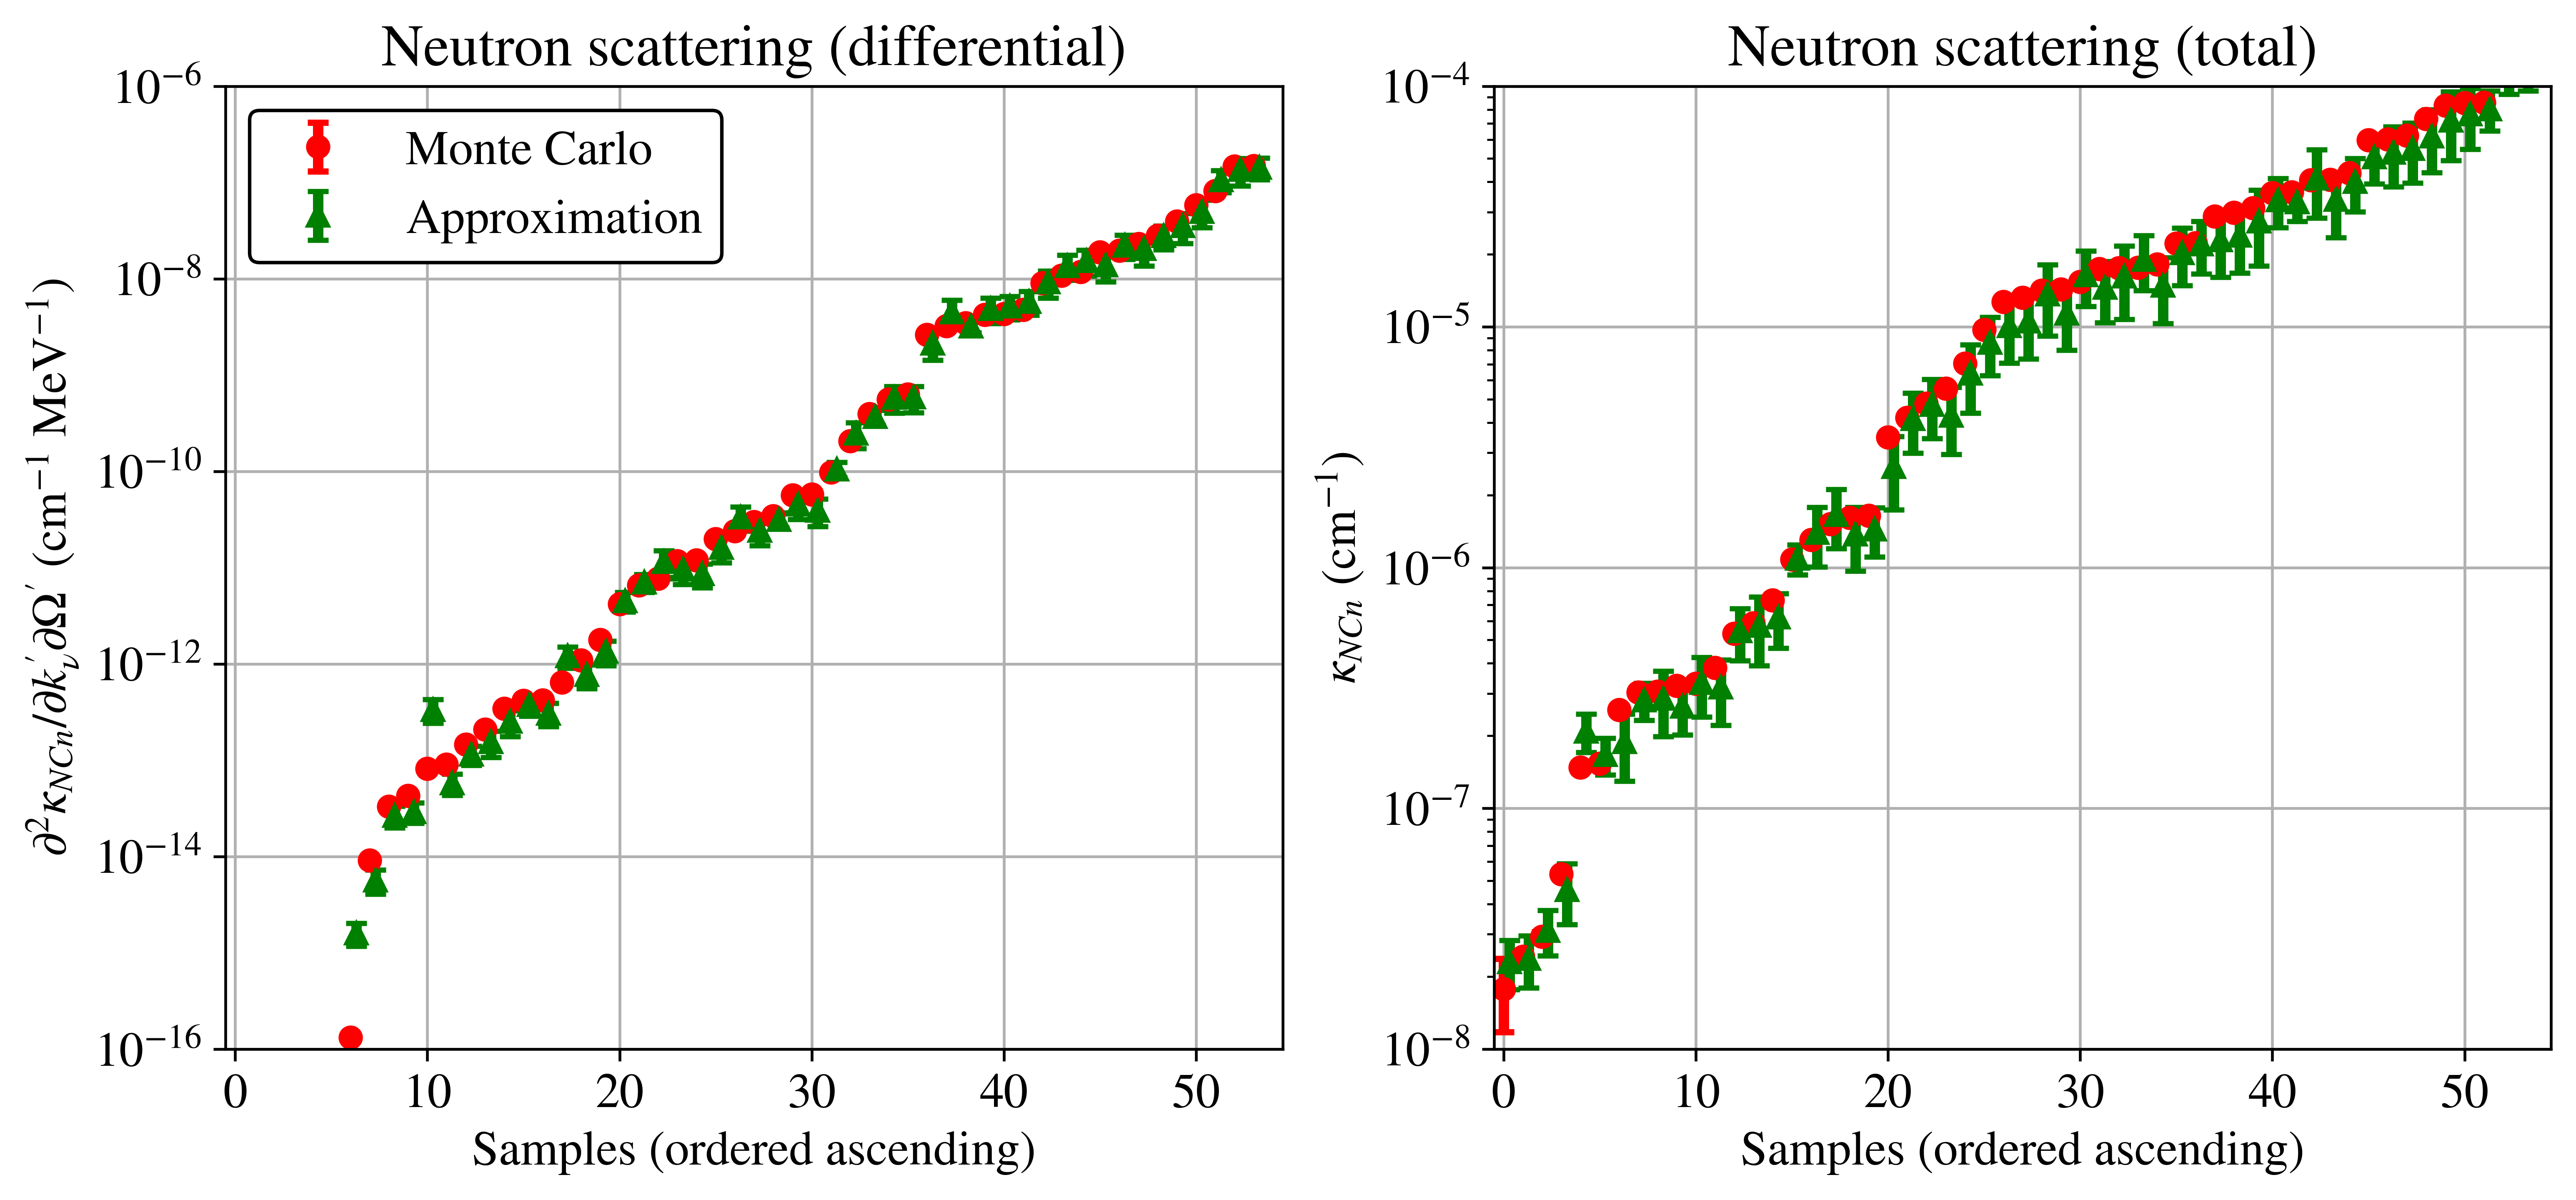

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax

test_ix = 0
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

dn_approx = [10**13 / HBARC * mo.kappan_nc_diff(sorted_data[ix, -10], sorted_data[ix, -9], (1 - sorted_data[ix, -6]) * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1]) for ix in range(54)]
dn_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(dn_approx)]

chisq_dn = (sorted_data[:, 0] * GF**2 * 10**13 / HBARC - np.array(dn_approx))**2 / ((sorted_data[:, 1] * GF**2 * 10**13 / HBARC)**2 + np.array(dn_approx_err)**2)
chisq_dn_lim = chisq_dn[sorted_data[:, 0] * GF**2 * 10**13 / HBARC > 10**-20]

xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0] * GF**2 * 10**13 / HBARC, sorted_data[:, 1] * GF**2 * 10**13 / HBARC, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], dn_approx, dn_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC

n_approx = [10**13 * mo.kappan_nc(sorted_data[ix, -10], sorted_data[ix, -9], (1 - sorted_data[ix, -6]) * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4]) for ix in range(len(sorted_data[:, 0]))]
n_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(n_approx)]

chisq_n = (sorted_data[:, 2] * GF**2 * 10**13 - np.array(n_approx))**2 / ((sorted_data[:, 3] * GF**2 * 10**13)**2 + np.array(n_approx_err)**2)

ax2.errorbar(xpts, sorted_data[:, 2] * GF**2 * 10**13, sorted_data[:, 3] * GF**2 * 10**13, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], n_approx, n_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax2.set_xlim([-0.6, 3.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutron scattering (differential)')
ax2.set_title('Neutron scattering (total)')
ax1.set_ylim([1e-16, 1e-6])
ax2.set_ylim([1e-8, 1e-4])

In [6]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

dnchi_lim = np.average(chisq_dn_lim) 
nchi = np.average(chisq_n) 
dnchi = np.average(chisq_dn)

plt.hist(chisq_dn, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_n, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 3])
plt.ylim([0, 45])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 54)')
#plt.text(11, 40, , fontsize = 20)
#plt.text(11, 34, f'Total: $\chi^2 / N$ = {nchi:.2f}', fontsize = 20)
plt.title('Relative error of neutral current opacity on neutrons')
leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20} cm^{-1}$): $\chi^2 / N$' + f' = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')

leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')


<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_416/1887994395.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_416/1887994395.py:18: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dnchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20} cm^{-1}$): $\chi^2 / N$' + f' = {dnchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {nchi:.2f}')
/tmp/ipykernel_416/1887994395.py:18: SyntaxWarning: invalid escape sequence '\k'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 /

In [427]:
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

In [434]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax

test_ix = 4
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] 
isdegen = np.logical_and(sorted_both[:, 4] > sorted_both[:, 5], 100 > sorted_both[:, 4])
sorted_data = sorted_both[isdegen]

dp_approx = [10**13 / HBARC * mo.kappap_nc_diff(sorted_data[ix, -10], sorted_data[ix, -9], sorted_data[ix, -6] * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4], sorted_data[ix, -3], sorted_data[ix, -2], sorted_data[ix, -1]) for ix in range(len(sorted_data[:, 0]))]
dp_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(dp_approx)]

chisq_dp = (sorted_data[:, 4] * GF**2 * 10**13 / (2 * HBARC) - np.array(dp_approx))**2 / ((sorted_data[:, 5] * GF**2 * 10**13 / (2 *HBARC))**2 + np.array(dp_approx_err)**2)
chisq_dp_lim = chisq_dp[sorted_data[:, 4] * GF**2 * 10**13 / (2 * HBARC) > 10**-20]

xpts = range(len(sorted_data[:, 0]))#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts[:-7], sorted_data[7:, 4] * GF**2 * 10**13 / (2 * HBARC), sorted_data[7:, 5] * GF**2 * 10**13 / (2 * HBARC), fmt = 'ro', capsize = 3, capthick = 1.8)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts][:-7], dp_approx[7:], dp_approx_err[7:], fmt = 'g^', capsize = 3, capthick = 1.5)
#ax1.plot(xpts, sorted_data[:, 14] * GF**2 * 10**13 / (2 * HBARC), 'x')

test_ix = 6
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = np.logical_and(sorted_both[:, 6] > sorted_both[:, 7], 100 > sorted_both[:, 6])
sorted_data = sorted_both[isdegen]
xpts = range(len(sorted_data[:, 0]))

p_approx = [10**13 * mo.kappap_nc(sorted_data[ix, -10], sorted_data[ix, -9], sorted_data[ix, -6] * sorted_data[ix, -7],
    sorted_data[ix, -5], sorted_data[ix, -4]) for ix in range(len(sorted_data[:, 0]))]
p_approx_err = [elt * sqrt((sorted_data[ix, -9] + sorted_data[ix, -5] + sorted_data[ix, -3]) / MN) for ix, elt in enumerate(p_approx)]

chisq_p = (sorted_data[:, 6] * GF**2 * 10**13 / 2 - np.array(p_approx))**2 / ((sorted_data[:, 7] * GF**2 * 10**13 / 2)**2 + np.array(p_approx_err)**2)

ax2.errorbar(xpts, sorted_data[:, 6] * GF**2 * 10**13 / 2, sorted_data[:, 7] * GF**2 * 10**13 / 2, fmt = 'ro', capsize = 3, capthick = 1.8)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], p_approx, p_approx_err, fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 20.5])
ax2.set_xlim([-0.5, 30.5])
#ax2.set_xlim([-0.6, 3.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Proton scattering (differential)')
ax2.set_title('Proton scattering (total)')
ax1.set_ylim([1e-15, 1e-6])
ax2.set_ylim([1e-9, 5e-5])

<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:39: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_340/384760503.py:39: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{-1}$ MeV$^{-1}$)')
/tmp/ipykernel_340/384760503.py:40: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')


(1e-09, 5e-05)

In [433]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

dpchi_lim = np.average(chisq_dp_lim) 
pchi = np.average(chisq_p) 
dpchi = np.average(chisq_dp)

plt.hist(chisq_dp, bins = 40, range = [0, 20], color = 'orange', alpha = 0.7, zorder = 3)
plt.hist(chisq_p, bins = 40, range = [0, 20], color = 'blue', zorder = 2)
plt.xlim([0, 3])
plt.ylim([0, 25])
plt.grid(True)
plt.xlabel('$\chi^2$')
plt.ylabel('Samples per bin (N = 30)')
#plt.text(11, 40, , fontsize = 20)
#plt.text(11, 34, f'Total: $\chi^2 / N$ = {nchi:.2f}', fontsize = 20)
plt.title('Relative error of neutral current opacity on protons')
leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dpchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20}$ cm$^{-1}$ MeV$^{-1}$): $\chi^2 / N$' + f' = {dpchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {pchi:.2f}')

leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')


<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\k'
<>:18: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/3520167550.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$')
/tmp/ipykernel_340/3520167550.py:18: SyntaxWarning: invalid escape sequence '\c'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Diff: $\chi^2 / N$ = {dpchi:.2f}'  + '\n' + 'Diff ($\kappa > 10^{-20}$ cm$^{-1}$ MeV$^{-1}$): $\chi^2 / N$' + f' = {dpchi_lim:.2f}' + '\n' + f'Total: $\chi^2 / N$ = {pchi:.2f}')
/tmp/ipykernel_340/3520167550.py:18: SyntaxWarning: invalid escape sequence '\k'
  leg = plt.legend(['Differential opacity', 'Total opacity'], title = f'Di

<>:45: SyntaxWarning: invalid escape sequence '\k'
<>:51: SyntaxWarning: invalid escape sequence '\,'
<>:45: SyntaxWarning: invalid escape sequence '\k'
<>:51: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_340/3350338675.py:45: SyntaxWarning: invalid escape sequence '\k'
  ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')
/tmp/ipykernel_340/3350338675.py:51: SyntaxWarning: invalid escape sequence '\,'
  leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$\n$U_I = 0$', labelspacing = 0)
/tmp/ipykernel_340/3350338675.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_340/3350338675.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_340/3350338675.py:51: UserW

(1e-05, 0.01)

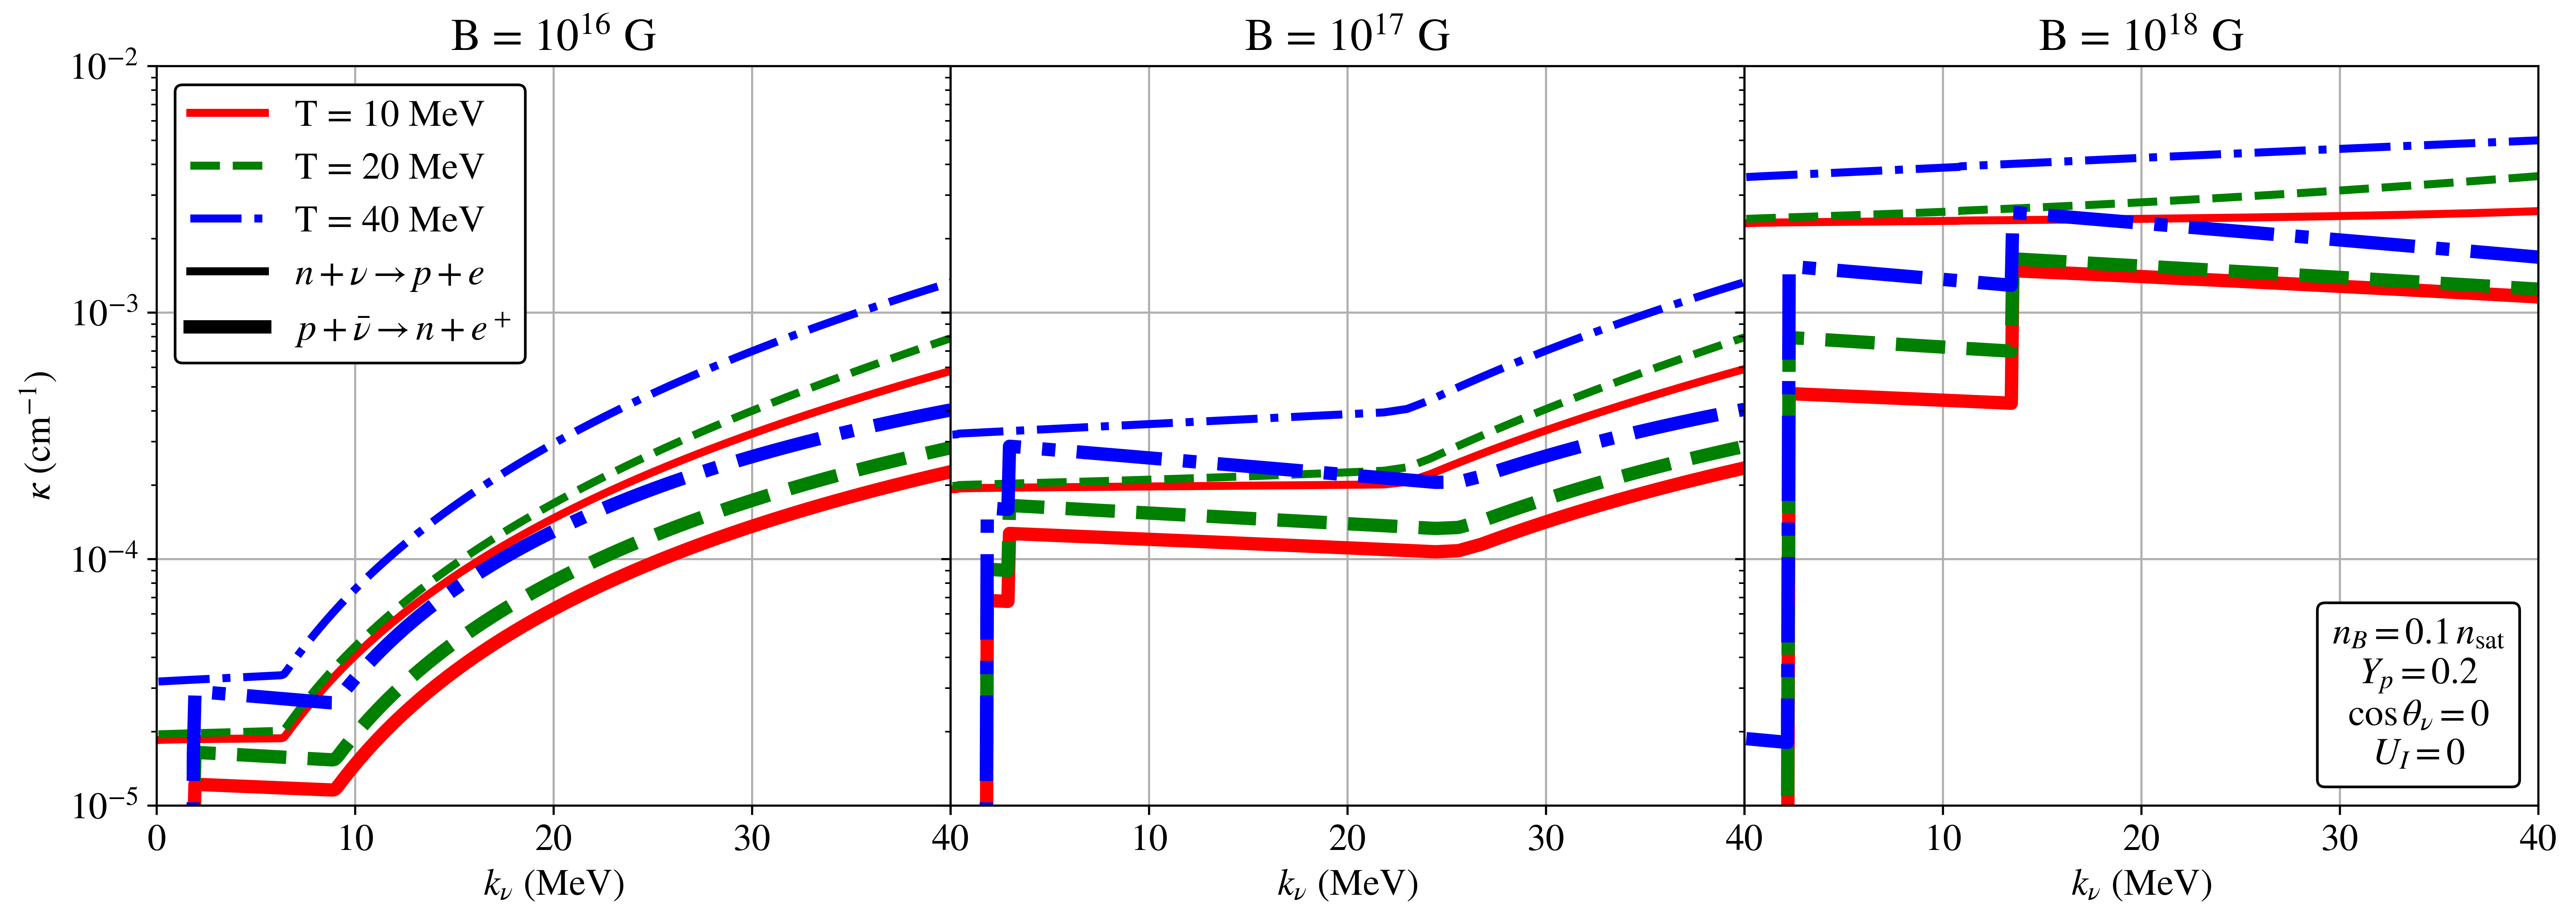

In [517]:
knu = linspace(0.1 / HBARC, 40 / HBARC, 500)
fig, ax = plt.subplots(1, 3, figsize = (16, 5), sharey = True)
fig.subplots_adjust(wspace = 0)

eb1 = 10 * G15_TO_FM
eb2 = 100 * G15_TO_FM
eb3 = 1000 * G15_TO_FM
eb_list = [eb1, eb2, eb3]

t1 = 10 / HBARC
t2 = 20 / HBARC
t3 = 40 / HBARC
t_list = [t1, t2, t3]

nb = 0.016
yp = 0.2

mue_arr = np.empty((3, 3))
for eb_ix in range(3):
    for t_ix in range(3):
        mue_arr[eb_ix, t_ix] = mo.mue_of_n(nb * yp, eb_list[eb_ix], t_list[t_ix])

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappan(eb, t1, mue_arr[ix, 0], nb, yp, elt, 0, 0) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappan(eb, t2, mue_arr[ix, 1], nb, yp, elt, 0, 0) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappan(eb, t3, mue_arr[ix, 2], nb, yp, elt, 0, 0) for elt in knu], 'b-.')

ax[0].plot([-3, -2], [1, 1], 'k-')
ax[0].plot([-3, -2], [1, 1], 'k-', lw = 5)

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappap(eb, t1, mue_arr[ix, 0], nb, yp, elt, 0, 0) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappap(eb, t2, mue_arr[ix, 1], nb, yp, elt, 0, 0) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappap(eb, t3, mue_arr[ix, 2], nb, yp, elt, 0, 0) for elt in knu], 'b-.', lw = 5)

for aix, ax_temp in enumerate(ax):
    ax_temp.set_xlim([0, 40])
    ax_temp.set_xlabel('$k_\\nu$ (MeV)')
    ax_temp.grid(alpha = 1)
    if not aix == 0:
        labels = ax_temp.get_xticklabels()
        ax_temp.set_xticklabels([' '] + labels[1:])

ax[0].set_yscale('log')
ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')

ax[0].set_title('B = $10^{16}$ G')
ax[1].set_title('B = $10^{17}$ G')
ax[2].set_title('B = $10^{18}$ G')

leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$\n$U_I = 0$', labelspacing = 0)
#leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')

ax[0].legend(['T = 10 MeV', 'T = 20 MeV', 'T = 40 MeV', '$n + \\nu \\rightarrow p + e$', '$p + \\bar{\\nu} \\rightarrow n + e^+$'])
ax[0].set_ylim([1e-5, 1e-2])
#ax[1].set_ylim([1e-7, 3e-5])


In [20]:
from importlib import reload
reload(mo)

<module 'magopacitiesmlk' from '/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py'>

<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:46: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:46: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_771/356980841.py:40: SyntaxWarning: invalid escape sequence '\k'
  ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')
/tmp/ipykernel_771/356980841.py:46: SyntaxWarning: invalid escape sequence '\,'
  leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$', labelspacing = 0, loc = 'lower right')
/tmp/ipykernel_771/356980841.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_771/356980841.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_771/356980841.py:46: 

(1e-09, 0.0001)

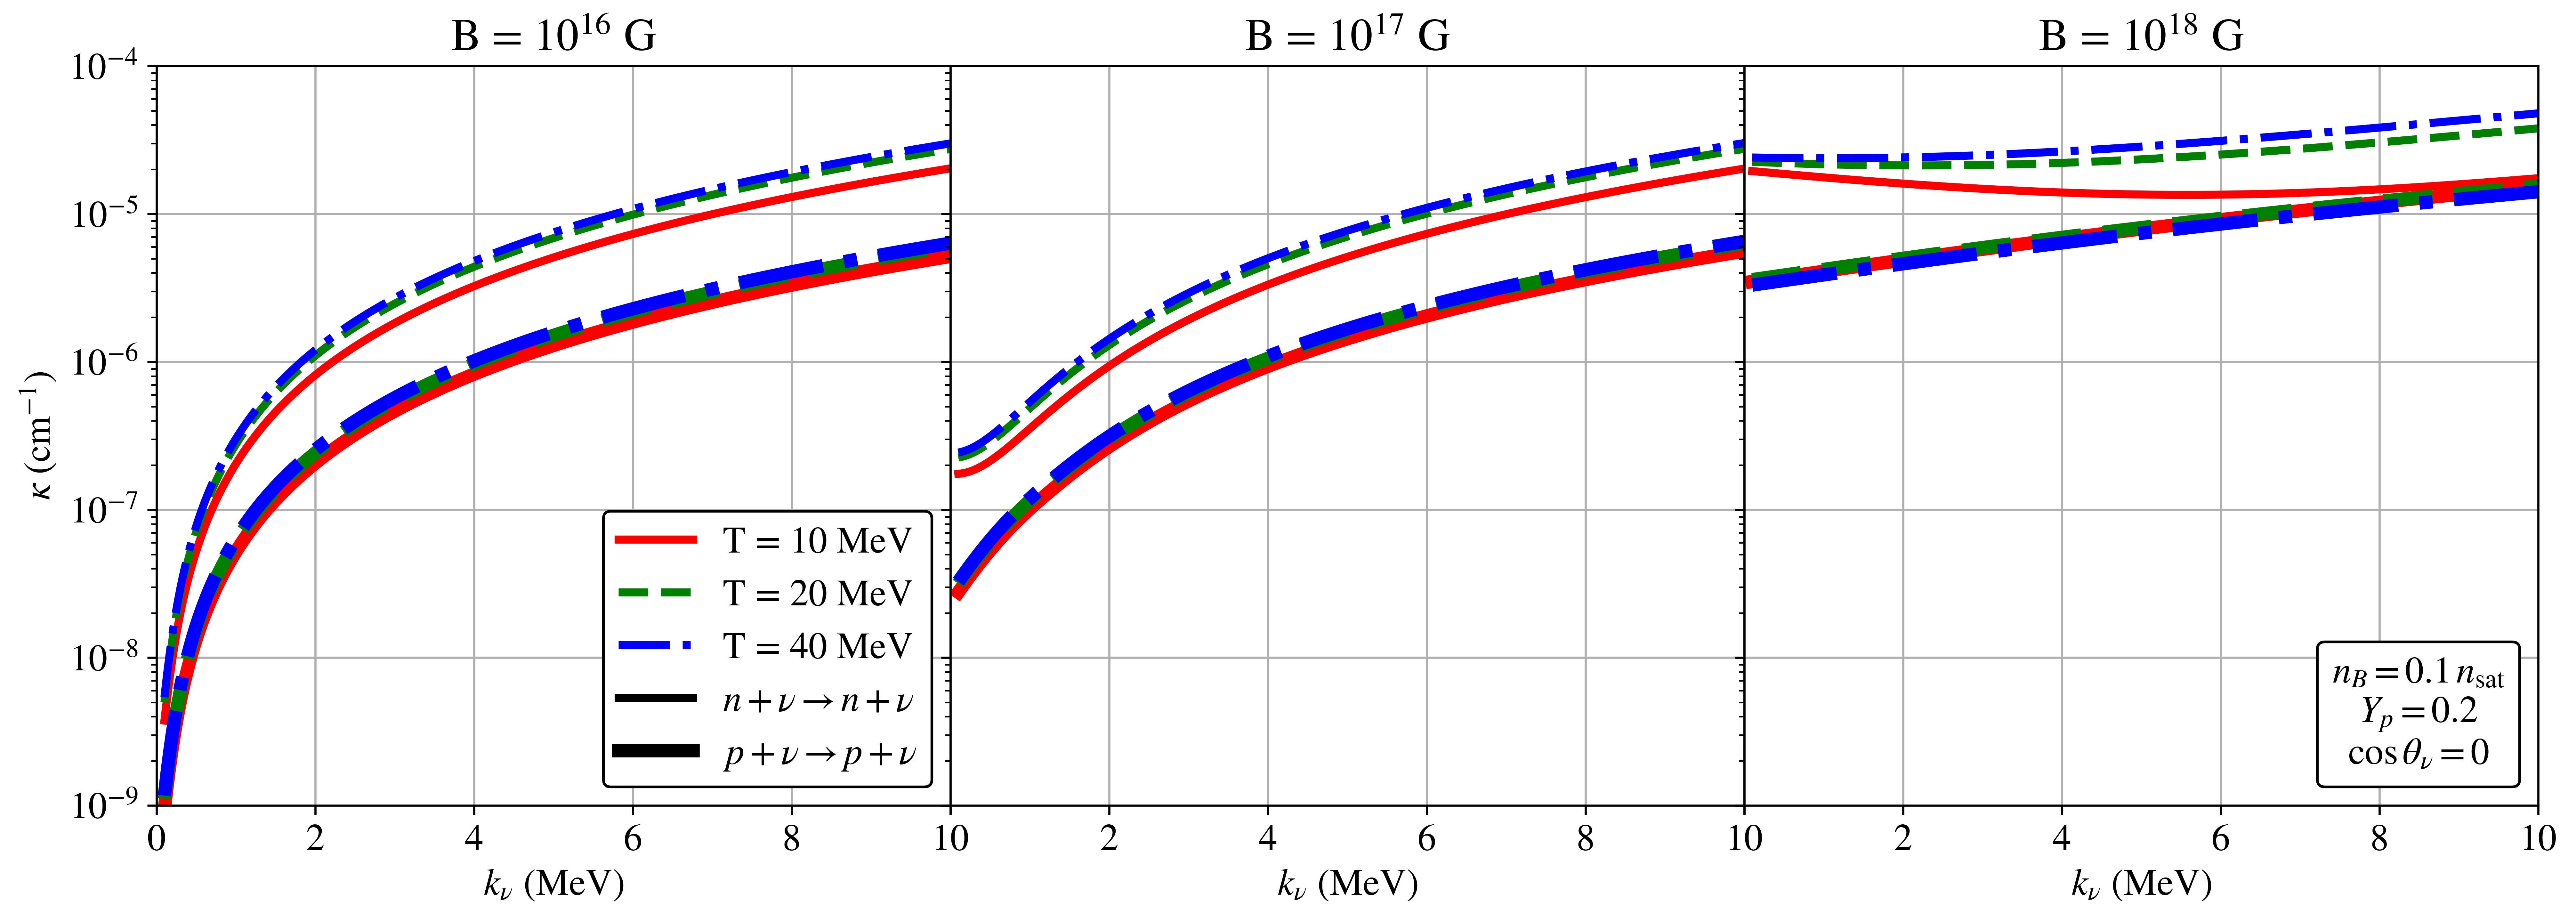

In [27]:
knu = linspace(0.1 / HBARC, 10 / HBARC, 300)
fig, ax = plt.subplots(1, 3, figsize = (16, 5), sharey = True)
fig.subplots_adjust(wspace = 0)

eb1 = 10 * G15_TO_FM
eb2 = 100 * G15_TO_FM
eb3 = 1000 * G15_TO_FM
eb_list = [eb1, eb2, eb3]

t1 = 10 / HBARC
t2 = 20 / HBARC
t3 = 40 / HBARC
t_list = [t1, t2, t3]

nb = 0.016
yp = 0.2

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappan_nc(eb, t1, nb * (1 - yp), elt, 0) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappan_nc(eb, t2, nb * (1 - yp), elt, 0) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappan_nc(eb, t3, nb * (1 - yp), elt, 0) for elt in knu], 'b-.')

ax[0].plot([-3, -2], [1, 1], 'k-')
ax[0].plot([-3, -2], [1, 1], 'k-', lw = 5)

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappap_nc(eb, t1, nb * yp, elt, 0) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappap_nc(eb, t2, nb * yp, elt, 0) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappap_nc(eb, t3, nb * yp, elt, 0) for elt in knu], 'b-.', lw = 5)

for aix, ax_temp in enumerate(ax):
    ax_temp.set_xlim([0, 10])
    ax_temp.set_xlabel('$k_\\nu$ (MeV)')
    ax_temp.grid(alpha = 1)
    if not aix == 0:
        labels = ax_temp.get_xticklabels()
        ax_temp.set_xticklabels([' '] + labels[1:])

ax[0].set_yscale('log')
ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')

ax[0].set_title('B = $10^{16}$ G')
ax[1].set_title('B = $10^{17}$ G')
ax[2].set_title('B = $10^{18}$ G')

leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$', labelspacing = 0, loc = 'lower right')
#leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')

ax[0].legend(['T = 10 MeV', 'T = 20 MeV', 'T = 40 MeV', '$n + \\nu \\rightarrow n + \\nu$', '$p + \\nu \\rightarrow p + \\nu$'])
ax[0].set_ylim([1e-9, 1e-4])
#ax[1].set_ylim([1e-7, 3e-5])


<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:46: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\k'
<>:46: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_771/3863544276.py:40: SyntaxWarning: invalid escape sequence '\k'
  ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')
/tmp/ipykernel_771/3863544276.py:46: SyntaxWarning: invalid escape sequence '\,'
  leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$', labelspacing = 0, loc = 'lower right')
/tmp/ipykernel_771/3863544276.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_771/3863544276.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' '] + labels[1:])
/tmp/ipykernel_771/3863544276.py

(1e-10, 1e-05)

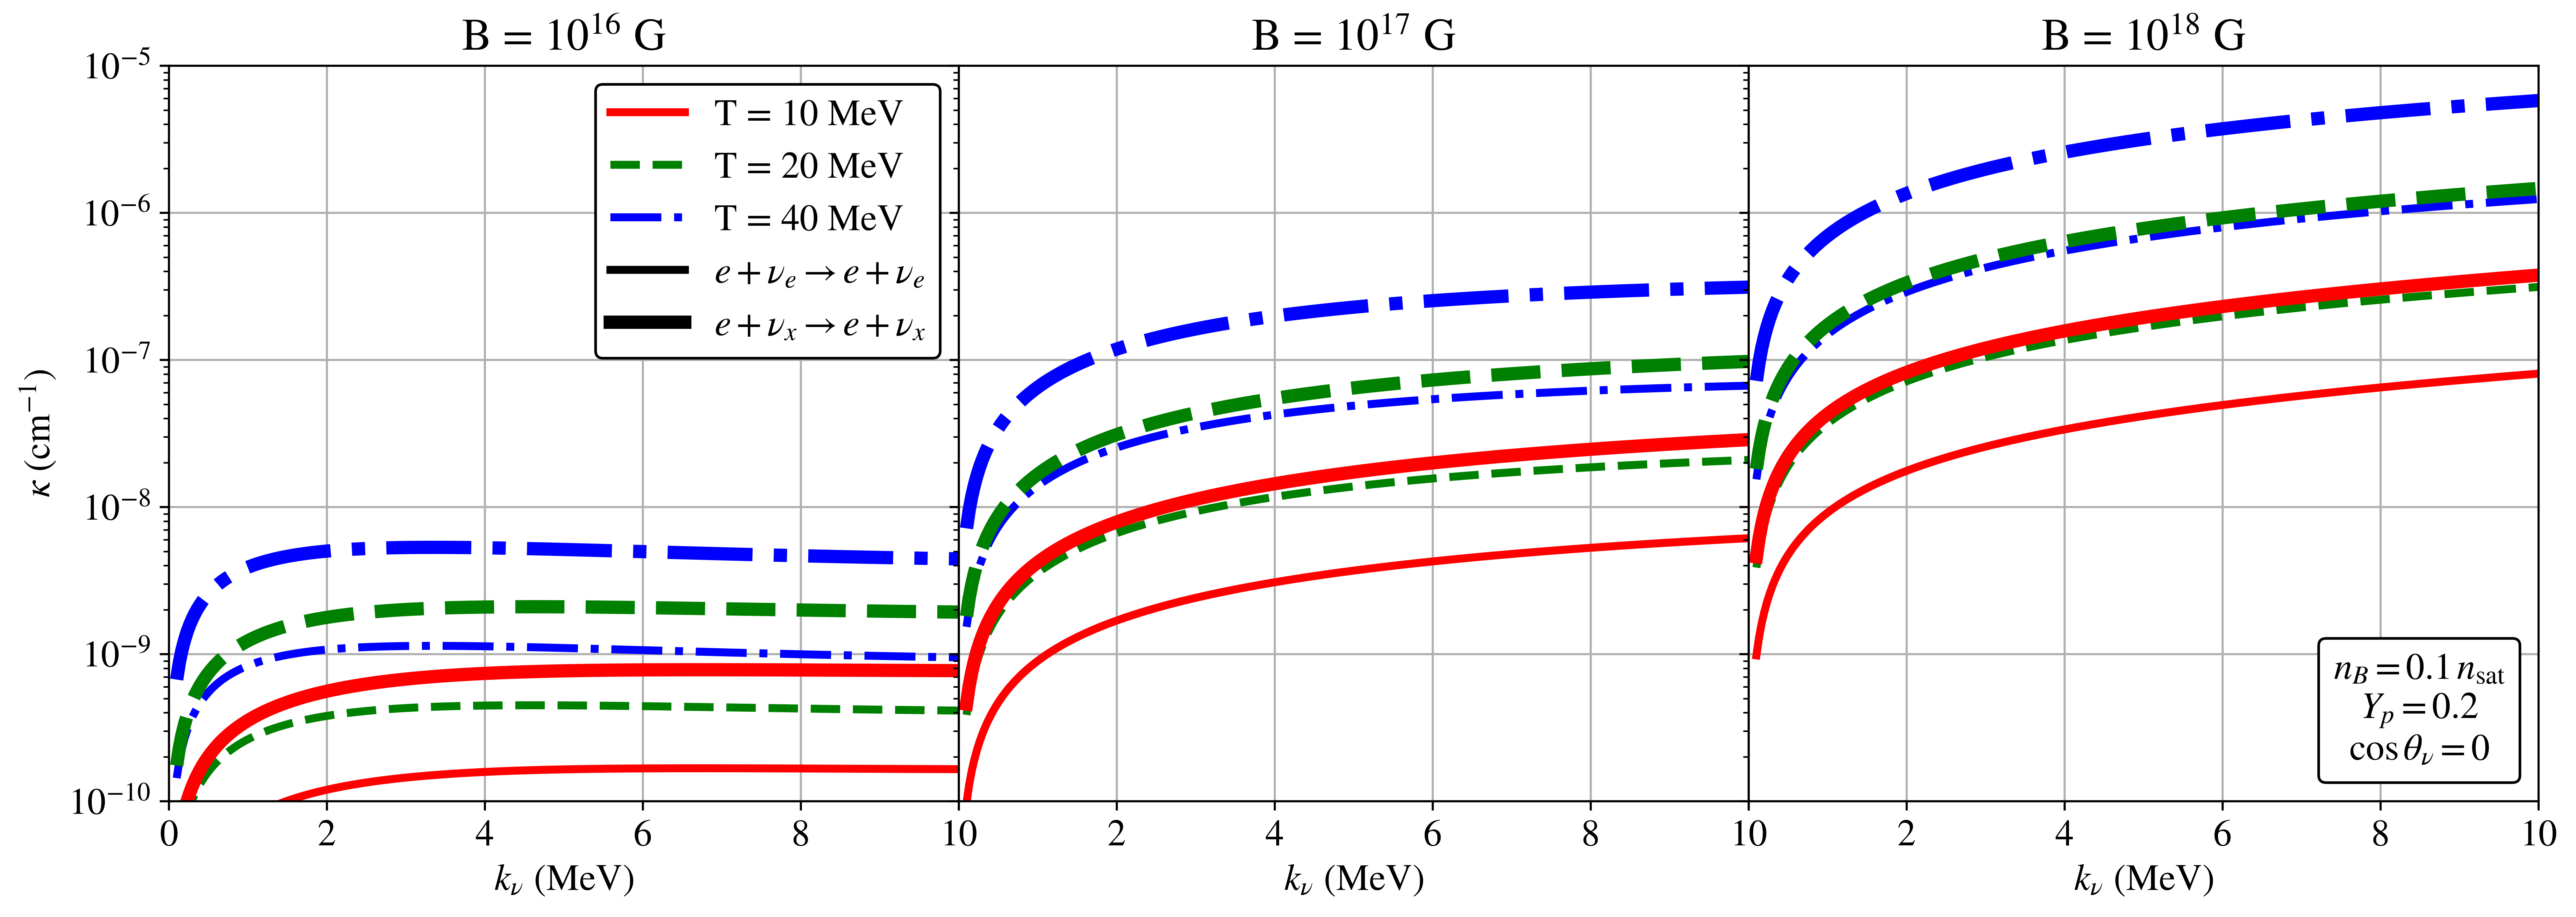

In [30]:
knu = linspace(0.1 / HBARC, 10 / HBARC, 300)
fig, ax = plt.subplots(1, 3, figsize = (16, 5), sharey = True)
fig.subplots_adjust(wspace = 0)

eb1 = 10 * G15_TO_FM
eb2 = 100 * G15_TO_FM
eb3 = 1000 * G15_TO_FM
eb_list = [eb1, eb2, eb3]

t1 = 10 / HBARC
t2 = 20 / HBARC
t3 = 40 / HBARC
t_list = [t1, t2, t3]

nb = 0.016
yp = 0.2

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappae_nc(eb, t1, nb * yp, elt, 0, True) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappae_nc(eb, t2, nb * yp, elt, 0, True) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappae_nc(eb, t3, nb * yp, elt, 0, True) for elt in knu], 'b-.')

ax[0].plot([-3, -2], [1, 1], 'k-')
ax[0].plot([-3, -2], [1, 1], 'k-', lw = 5)

for ix, eb in enumerate(eb_list):
    ax[ix].plot(knu * HBARC, [10**13 * mo.kappae_nc(eb, t1, nb * yp, elt, 0, False) for elt in knu], 'r-',
        knu * HBARC, [10**13 * mo.kappae_nc(eb, t2, nb * yp, elt, 0, False) for elt in knu], 'g--',
        knu * HBARC, [10**13 * mo.kappae_nc(eb, t3, nb * yp, elt, 0, False) for elt in knu], 'b-.', lw = 5)

for aix, ax_temp in enumerate(ax):
    ax_temp.set_xlim([0, 10])
    ax_temp.set_xlabel('$k_\\nu$ (MeV)')
    ax_temp.grid(alpha = 1)
    if not aix == 0:
        labels = ax_temp.get_xticklabels()
        ax_temp.set_xticklabels([' '] + labels[1:])

ax[0].set_yscale('log')
ax[0].set_ylabel('$\kappa$ (cm$^{-1}$)')

ax[0].set_title('B = $10^{16}$ G')
ax[1].set_title('B = $10^{17}$ G')
ax[2].set_title('B = $10^{18}$ G')

leg = ax[2].legend(title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$\cos \\theta_\\nu = 0$', labelspacing = 0, loc = 'lower right')
#leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')

ax[0].legend(['T = 10 MeV', 'T = 20 MeV', 'T = 40 MeV', '$e + \\nu_e \\rightarrow e + \\nu_e$', '$e + \\nu_x \\rightarrow e + \\nu_x$'])
ax[0].set_ylim([1e-10, 1e-5])
#ax[1].set_ylim([1e-7, 3e-5])


<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:20: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/3310904360.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_\\nu$')
/tmp/ipykernel_340/3310904360.py:20: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')


Text(0.5, 1.0, 'Anisotropies in scattering rates')

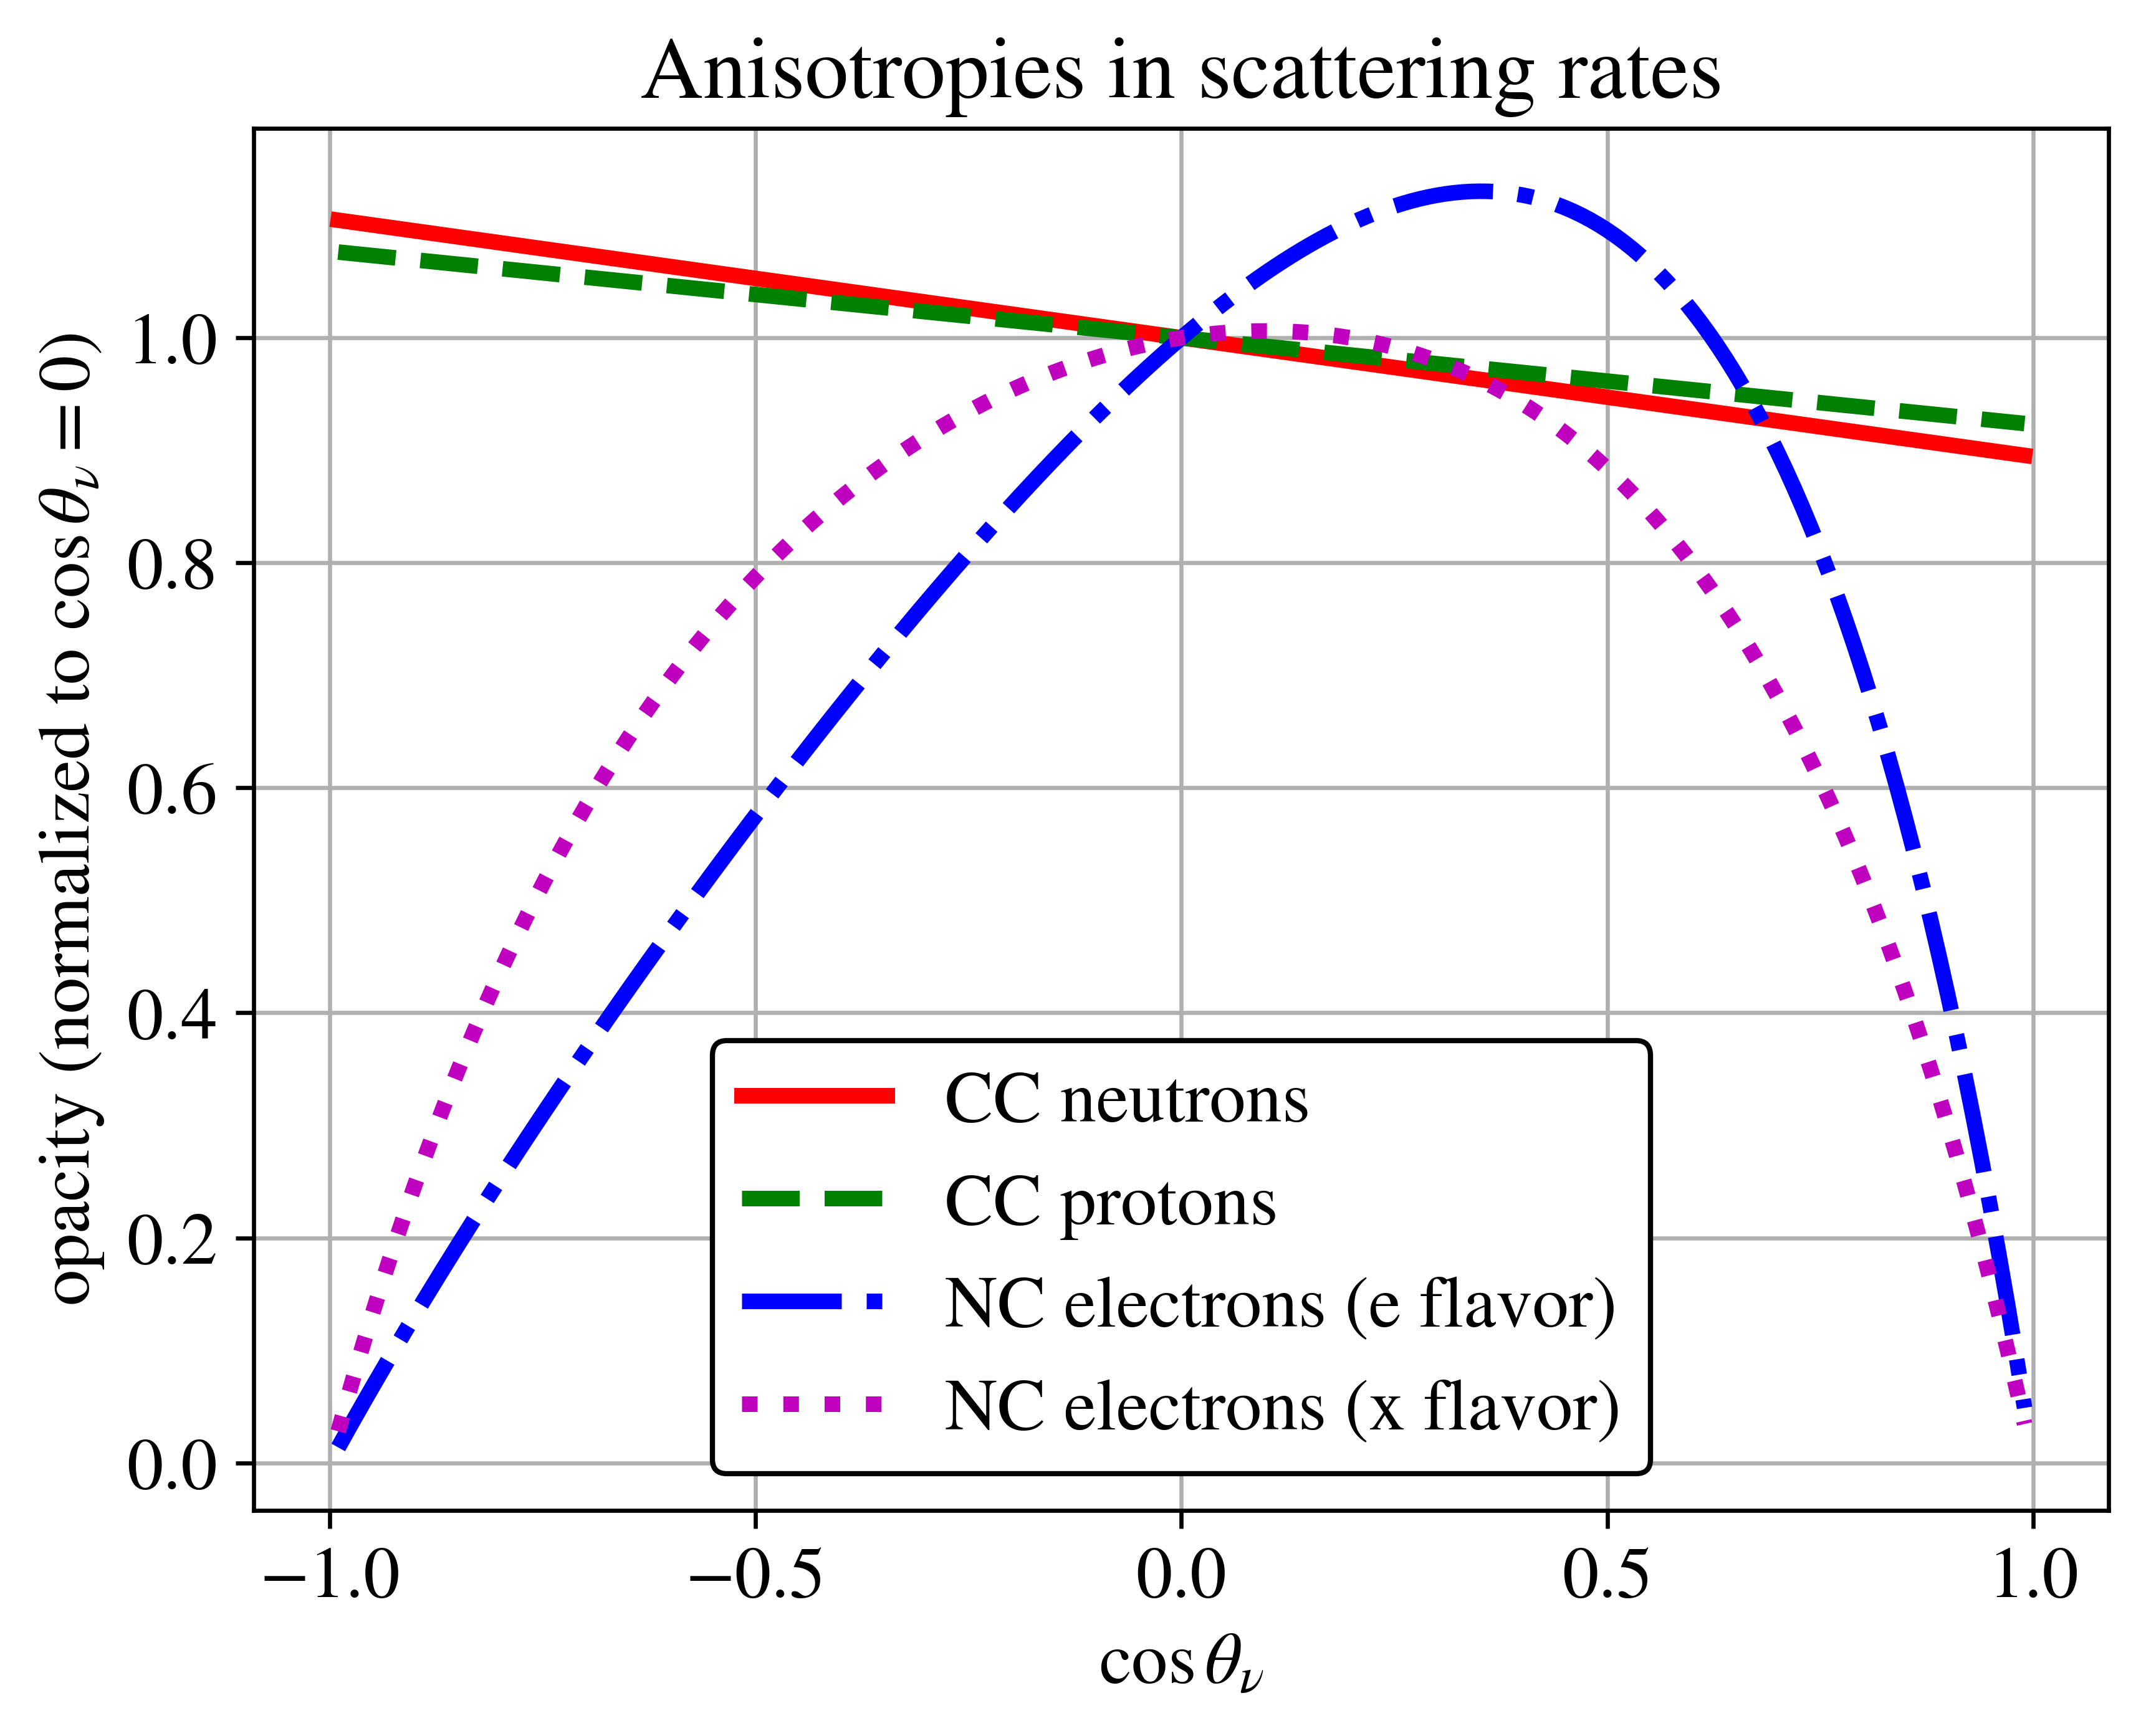

In [474]:
eb = 100 * G15_TO_FM
t = 20 / HBARC
nb = 0.16 * 10**-1
yp = 0.2

ct_space = linspace(-0.99, 0.99, 199)
mue = mo.mue_of_n(nb * yp, eb, t)

ccn = [mo.kappan(eb, t, mue, nb, yp, 10 / HBARC, ct, 0) / mo.kappan(eb, t, mue, nb, yp, 10 / HBARC, 0, 0) for ct in ct_space]
ccp = [mo.kappap(eb, t, mue, nb, yp, 10 / HBARC, ct, 0) / mo.kappap(eb, t, mue, nb, yp, 10 / HBARC, 0, 0) for ct in ct_space]
ncn = [mo.kappan_nc(eb, t, nb * (1 - yp), 10 / HBARC, ct) / mo.kappan_nc(eb, t, nb * (1 - yp), 10 / HBARC, 0) for ct in ct_space]
ncp = [mo.kappap_nc(eb, t, nb * yp, 10 / HBARC, ct) / mo.kappap_nc(eb, t, nb * yp, 10 / HBARC, 0) for ct in ct_space]
nce = [mo.kappae_nc(eb, t, mue, 10 / HBARC, ct, False) / mo.kappae_nc(eb, t, mue, 10 / HBARC, 0, False) for ct in ct_space]
ncex = [mo.kappae_nc(eb, t, mue, 10 / HBARC, ct, True) / mo.kappae_nc(eb, t, mue, 10 / HBARC, 0, True) for ct in ct_space]

plt.plot(ct_space, ccn, 'r-', ct_space, ccp, 'g--', ct_space, nce, 'b-.', ct_space, ncex, 'm:')
plt.grid(True)
plt.legend(['CC neutrons', 'CC protons', 'NC electrons (e flavor)', 'NC electrons (x flavor)'])
plt.xlabel('$\cos \\theta_\\nu$')
plt.ylabel('opacity (normalized to $\cos \\theta_\\nu = 0$)')
plt.title('Anisotropies in scattering rates')

In [493]:
kern_data[0, :]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:40: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_340/2302811170.py:36: SyntaxWarning: invalid escape sequence '\,'
  leg = plt.legend(['$10^{16}$ G', '$10^{17}$ G', '$10^{18}$ G'], title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$T = 20$ MeV\n$k_\\nu = k\'_\\nu = 10$ MeV\n$q = 15$ MeV')
/tmp/ipykernel_340/2302811170.py:40: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$\cos \\theta_q$')


(-1.0, 1.0)

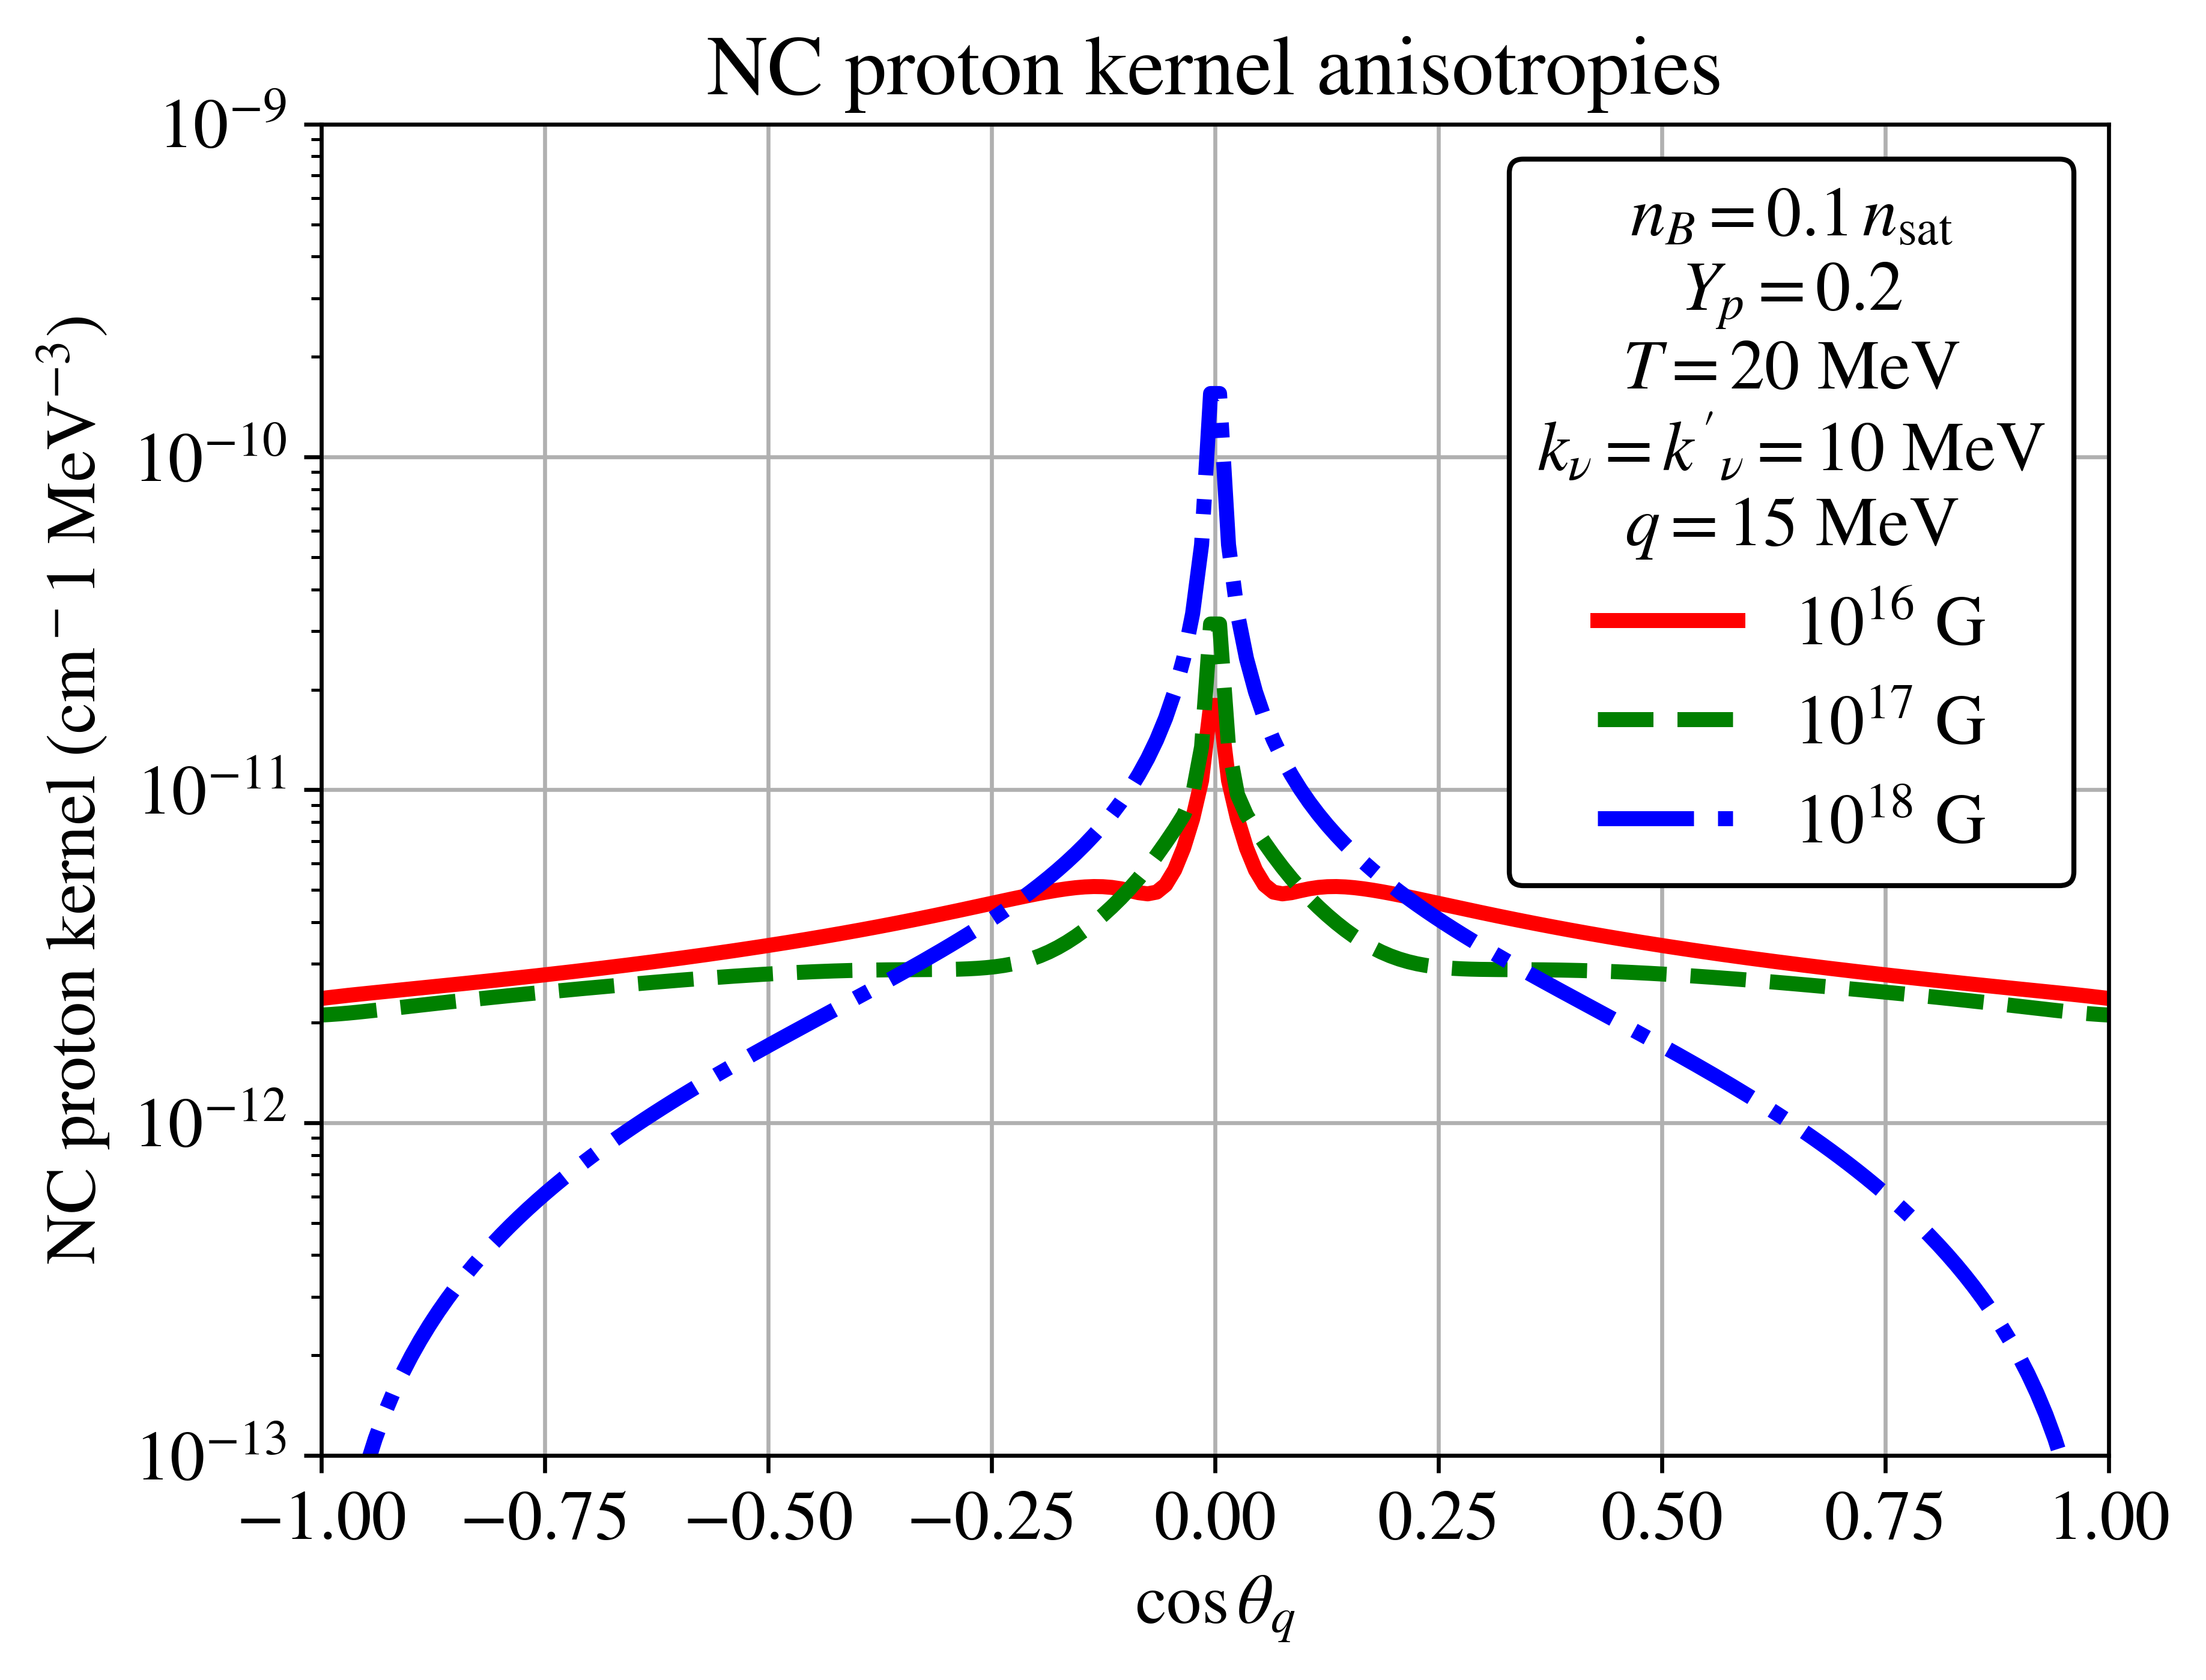

In [ ]:
kern_data = np.empty((200, 3))
with open('./opacity csvs/pkern.csv', 'r') as file:
    reader = csv.reader(file)
    for ix, row in enumerate(reader):
        kern_data[ix, :] = [float(elt) for elt in row]

q = 15 / HBARC
knu = 10 / HBARC
knupr = knu
t = 20 / HBARC
nb = 0.16 * 0.1
yp = 0.2

cq_space = linspace(-1, 1, 200)
eb1 = 30 * G15_TO_FM
eb2 = 100 * G15_TO_FM
eb3 = 1000 * G15_TO_FM

kern_data = np.empty((3, 200))

norm1 = HBARC**3 / 10**13#mo.kappap_nc_diff(eb1, t, nb * yp, knu, -q / (2 * knu), knu, q / (2 * knu), 0) 
norm2 = HBARC**3 / 10**13#mo.kappap_nc_diff(eb2, t, nb * yp, knu, -q / (2 * knu), knu, q / (2 * knu), 0) 
norm3 = HBARC**3 / 10**13#mo.kappap_nc_diff(eb3, t, nb * yp, knu, -q / (2 * knu), knu, q / (2 * knu), 0) 

for cix, cosq in enumerate(cq_space):
    cost = - q * cosq / (2 * knu)
    costpr = q * cosq / (2 * knu)
    phi = np.arccos(- (q**2 * (1 - cosq**2) - knu**2 * (1 - cost**2) - knu**2 * (1 - costpr**2)) / (2 * knu**2 * sqrt((1 - cost**2) * (1 - costpr**2))))

    kern_data[0, cix] = mo.kappap_nc_diff(eb1, t, nb * yp, knu, cost, knu, costpr, phi) / norm1
    kern_data[1, cix] = mo.kappap_nc_diff(eb2, t, nb * yp, knu, cost, knu, costpr, phi) / norm2
    kern_data[2, cix] = mo.kappap_nc_diff(eb3, t, nb * yp, knu, cost, knu, costpr, phi) / norm3

plt.plot(cq_space, kern_data[0, :], 'r-', cq_space, kern_data[1, :], 'g--', cq_space, kern_data[2, :], 'b-.')
plt.grid(True)
leg = plt.legend(['$10^{16}$ G', '$10^{17}$ G', '$10^{18}$ G'], title = '$n_B = 0.1 \, n_{\\rm sat}$\n$Y_p = 0.2$\n$T = 20$ MeV\n$k_\\nu = k\'_\\nu = 10$ MeV\n$q = 15$ MeV')
leg.get_title().set_multialignment('center')
leg.get_title().set_ha('center')

plt.xlabel('$\cos \\theta_q$')
plt.ylabel('NC proton kernel (cm$^-1$ MeV$^{-3}$)')
plt.title('NC proton kernel anisotropies')
plt.yscale('log')
plt.ylim([1e-13, 1e-9])
plt.xlim([-1, 1])

In [8]:
reload(mo)
from scipy.integrate import quad, dblquad, tplquad, nquad

In [9]:
nb_space = 0.16 * logspace(-3, -1, 20)
yp = 0.2
t = 20 / HBARC
knu_max = 40 / HBARC

eb1 = 10 * G15_TO_FM
eb2 = 100 * G15_TO_FM
eb3 = 1000 * G15_TO_FM
eb_list = [eb1, eb2, eb3]

mue1 = []
mue2 = []
mue3 = []

for nb in nb_space:
    mue1.append(mo.mue_of_n(nb * yp, eb1, t))
    mue2.append(mo.mue_of_n(nb * yp, eb2, t))
    mue3.append(mo.mue_of_n(nb * yp, eb3, t))

cc_factor = 10**39 * 3 * 10**23 * 1.602 * 10**-6 * HBARC

e_ccn1 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcan(eb1, t, mue1[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]
e_ccn2 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcan(eb2, t, mue2[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]
e_ccn3 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcan(eb3, t, mue3[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]

e_ccp1 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcap(eb1, t, mue1[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]
e_ccp2 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcap(eb2, t, mue2[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]
e_ccp3 = [4 * pi * cc_factor * quad(lambda knu: knu * mo.urcap(eb3, t, mue3[ix], nb, yp, knu, 0, 0), 0, knu_max)[0] for ix, nb in enumerate(nb_space)]

In [10]:
nc_factor = 10**39 * 3 * 10**23 * 1.602 * 10**-6 * HBARC
sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - (-mo.GN * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - (-mo.GN * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)

e_synchn1 = [3 * 4 * pi**2 * nc_factor * tplquad(lambda ct, knu, knupr: (knu + knupr) * sol_ang(eb1, knu, knupr) * mo.synchn(eb1, t, nb * (1 - yp), knu, ct, knupr, ct, 0), 0, knu_max, 0, knu_max, -1, 1)[0] for nb in nb_space]
print('one done')
e_synchn2 = [3 * 4 * pi**2 * nc_factor * tplquad(lambda ct, knu, knupr: (knu + knupr) * sol_ang(eb2, knu, knupr) * mo.synchn(eb2, t, nb * (1 - yp), knu, ct, knupr, ct, 0), 0, knu_max, 0, knu_max, -1, 1)[0] for nb in nb_space]
print('one done')
e_synchn3 = [3 * 4 * pi**2 * nc_factor * tplquad(lambda ct, knu, knupr: (knu + knupr) * sol_ang(eb3, knu, knupr) * mo.synchn(eb3, t, nb * (1 - yp), knu, ct, knupr, ct, 0), 0, knu_max, 0, knu_max, -1, 1)[0] for nb in nb_space]
print('one done')


one done
one done
one done


In [11]:
nc_factor = 10**39 * 3 * 10**23 * 1.602 * 10**-6 * HBARC
sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)

ct_space = np.linspace(-1, 1, 100)[:, np.newaxis, np.newaxis]
knu_space = np.linspace(0 + 0.5 / HBARC, knu_max + 0.5 / HBARC, 100)[np.newaxis, :, np.newaxis]
knupr_space = np.linspace(0, knu_max, 100)[np.newaxis, np.newaxis, :]

reload(mo)

test = (knu_space + knupr_space) * sol_ang(eb1, knu_space, knupr_space) * mo.synchp(eb1, t, nb_space[5] * yp, knu_space, ct_space, knupr_space, ct_space, 0)
print(test)

/tmp/ipykernel_275/4017734890.py:2: RuntimeWarning: divide by zero encountered in divide
  sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)
/tmp/ipykernel_275/4017734890.py:2: RuntimeWarning: invalid value encountered in multiply
  sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)
/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py:498: RuntimeWarning: invalid value encountered in sqrt
  qperp = np.sqrt(q**2 - qz**2)
/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py:526: RuntimeWarning: invalid value encountered in multiply
  polar_avg = np.exp(exponent) * np.sqrt(np.abs(cosq)) + (1 - cosq**2) * ia \
/home/mia/Documents/GitHub/HEA-neutrinos/src/magopaci

[[[           nan 4.33344569e-42 1.25403624e-41 ... 1.84552252e-38
   1.88352854e-38 1.92192190e-38]
  [           nan 1.13369943e-41            nan ... 3.37082107e-38
   3.43988919e-38 3.50965766e-38]
  [           nan 2.14706204e-41 5.30748671e-41 ... 4.92648136e-38
              nan            nan]
  ...
  [           nan 1.52573189e-38 3.08221288e-38 ... 2.91163801e-36
   2.95672196e-36 3.00211339e-36]
  [           nan 1.55679400e-38 3.14465010e-38 ... 2.95634190e-36
   3.00204008e-36 3.04804889e-36]
  [           nan 1.58816911e-38 3.20771334e-38 ... 3.00134940e-36
   3.04766495e-36 3.09429426e-36]]

 [[           nan 1.15498828e-41 9.92319139e-42 ... 7.01443960e-39
   7.15883932e-39 7.30471073e-39]
  [           nan 8.97096595e-42 1.58813825e-41 ... 1.28116808e-38
   1.30740981e-38 1.33391764e-38]
  [           nan 1.14896035e-41 2.44514411e-41 ... 1.87242371e-38
   1.91058616e-38 1.94913363e-38]
  ...
  [           nan 5.79894024e-39 1.17146662e-38 ...            nan
          

/home/mia/Documents/GitHub/HEA-neutrinos/src/magopacitiesmlk.py:534: RuntimeWarning: invalid value encountered in multiply
  return prefactor * spin_sum


In [32]:
np.sum(np.nan_to_num(test, posinf = 0, neginf = 0))

np.float64(1.3631448908721014e-32)

In [27]:
np.sum(testinf)

np.int64(873426)

In [35]:
nc_factor = 10**39 * 3 * 10**23 * 1.602 * 10**-6 * HBARC
sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)

ct_space = np.linspace(-1, 1, 100)[:, np.newaxis, np.newaxis]
knu_space = np.linspace(0 + 0.5 / HBARC, knu_max + 0.5 / HBARC, 100)[np.newaxis, :, np.newaxis]
knupr_space = np.linspace(0, knu_max, 100)[np.newaxis, np.newaxis, :]

reload(mo)

def synch_temp(eb, nb):
    grid = (knu_space + knupr_space) * sol_ang(eb, knu_space, knupr_space) * mo.synchp(eb, t, nb * yp, knu_space, ct_space, knupr_space, ct_space, 0)
    return 3 * 4 * pi**2 * nc_factor * knu_max**2 * 2 / (10**6) * np.sum(np.nan_to_num(grid, posinf = 0, neginf = 0))

e_synchp1 = [synch_temp(eb1, nb) for nb in nb_space]
print('one done')
e_synchp2 = [synch_temp(eb2, nb) for nb in nb_space]
print('one done')
e_synchp3 = [synch_temp(eb3, nb) for nb in nb_space]
print('one done')


/tmp/ipykernel_275/59270782.py:2: RuntimeWarning: divide by zero encountered in divide
  sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)
/tmp/ipykernel_275/59270782.py:2: RuntimeWarning: invalid value encountered in multiply
  sol_ang = lambda eb, knu, knupr: (1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr)))) * np.heaviside(1 - np.abs(1 - ((mo.GP - 2) * eb * (knu + knupr) / (2 * MN * knu * knupr))), 0)


one done
one done
one done


/tmp/ipykernel_275/875359831.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' ', ' '] + labels[2:])
/tmp/ipykernel_275/875359831.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_temp.set_xticklabels([' ', ' '] + labels[2:])


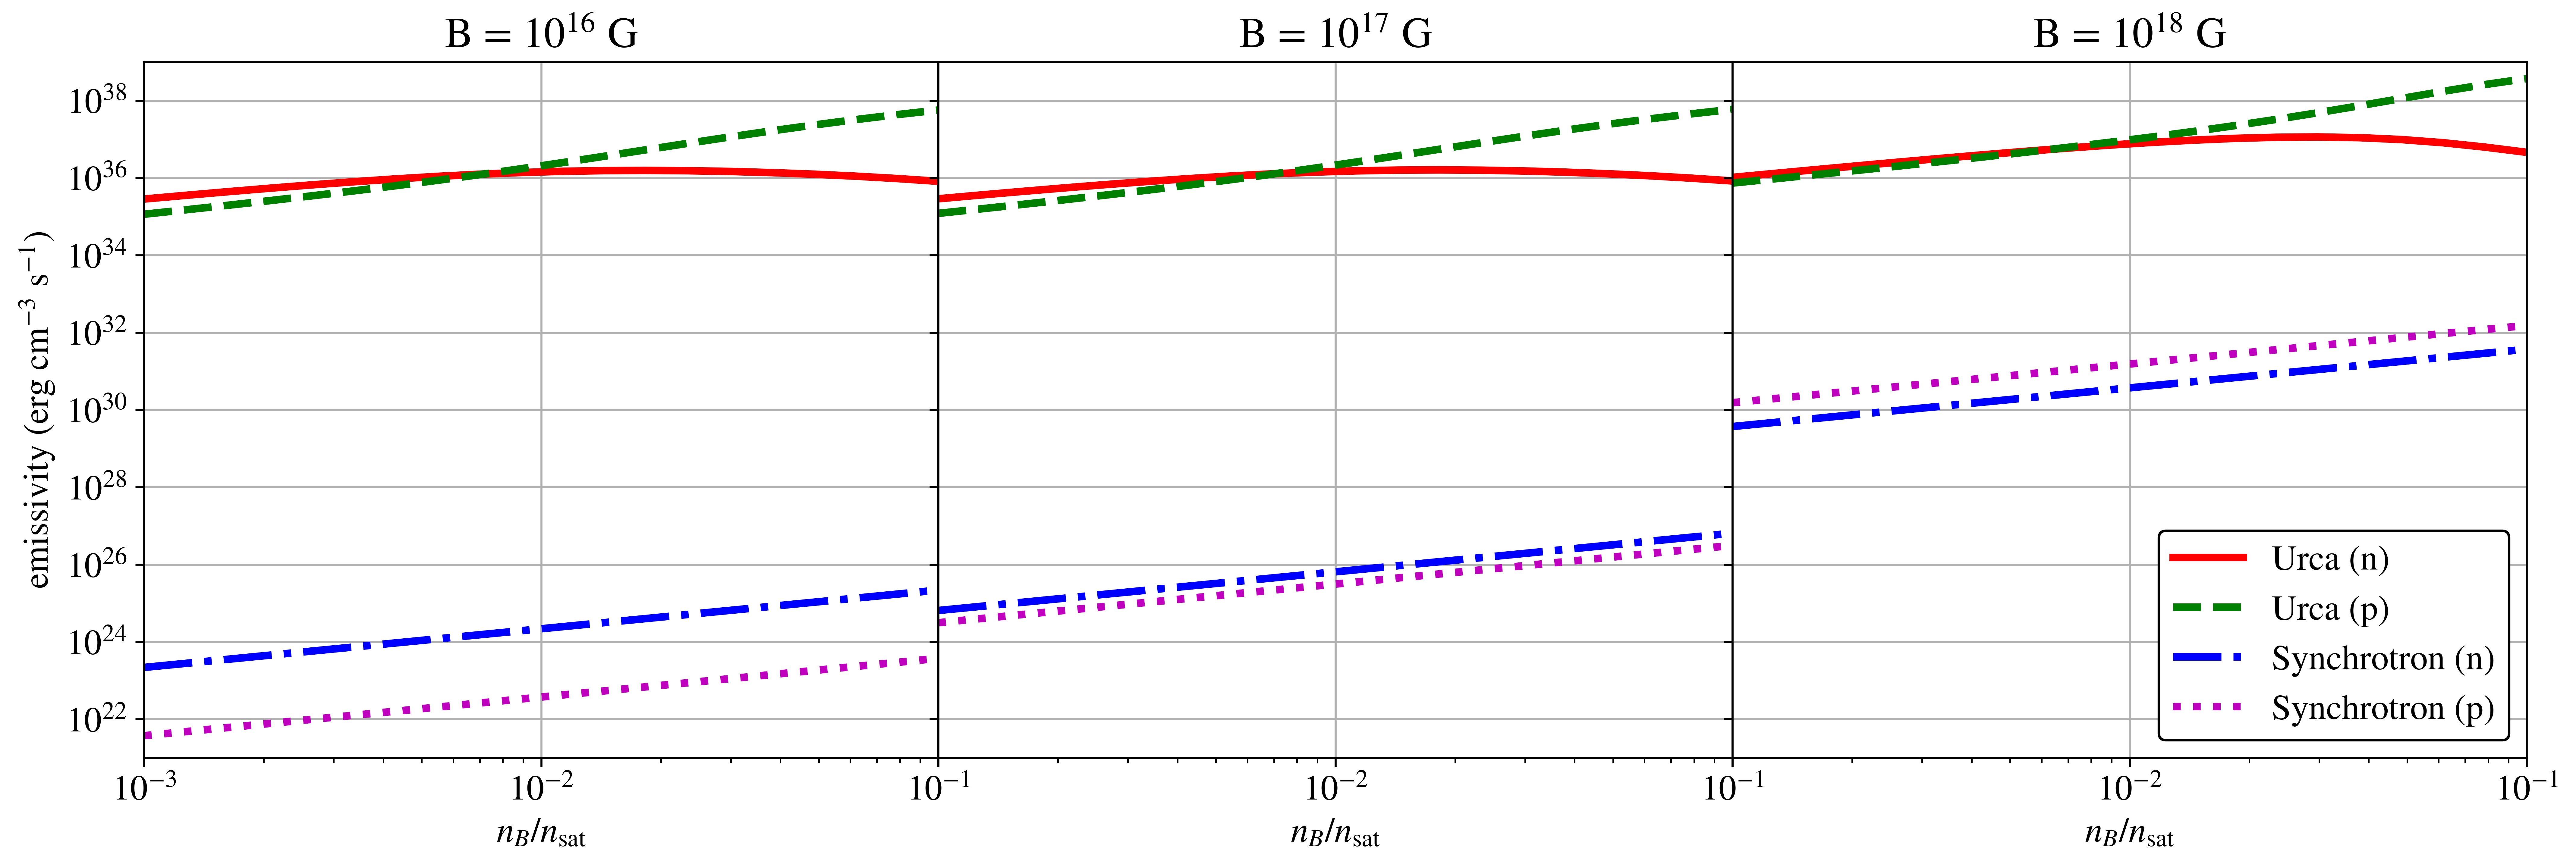

In [41]:
n_plot = nb_space / 0.16

fig, ax = plt.subplots(1, 3, figsize = (17, 5), sharey = True)
fig.subplots_adjust(wspace = 0)

ax1, ax2, ax3 = ax

ax1.plot(n_plot, e_ccn1, 'r-', n_plot, e_ccp1, 'g--', n_plot, e_synchn1, 'b-.', n_plot, e_synchp1, 'm:')
ax2.plot(n_plot, e_ccn2, 'r-', n_plot, e_ccp2, 'g--', n_plot, e_synchn2, 'b-.', n_plot, e_synchp2, 'm:')
ax3.plot(n_plot, e_ccn3, 'r-', n_plot, e_ccp3, 'g--', n_plot, e_synchn3, 'b-.', n_plot, e_synchp3, 'm:')

ax1.set_yscale('log')
ax1.set_ylabel('emissivity (erg cm$^{-3}$ s$^{-1}$)')
for ix, ax_temp in enumerate(ax):
    ax_temp.set_xscale('log')
    ax_temp.grid(alpha = 1)
    ax_temp.set_xlabel('$n_B / n_{\\rm sat}$')
    ax_temp.set_xlim([1e-3, 1e-1])
    if not ix == 0:
        labels = ax_temp.get_xticklabels()
        ax_temp.set_xticklabels([' ', ' '] + labels[2:])
ax1.set_ylim([1e21, 1e39])
        
ax1.set_title('B = $10^{16}$ G')
ax2.set_title('B = $10^{17}$ G')
ax3.set_title('B = $10^{18}$ G')
ax3.legend(['Urca (n)', 'Urca (p)', 'Synchrotron (n)', 'Synchrotron (p)'], loc = 'lower right')